# Data Discovery

In [1]:
import pandas as pd

In [2]:
#Lade Diagnosen
data = pd.read_csv('2022.07.05-fotodb-diag.txt', sep="                               ", names = ["Krankheit"], skip_blank_lines=True)

C:\Users\fabia\AppData\Local\Temp\ipykernel_20736\3274806862.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('2022.07.05-fotodb-diag.txt', sep="                               ", names = ["Krankheit"], skip_blank_lines=True)


In [3]:
data.loc[:, 'Krankheit']

0                  Ungeklärt  (Augenkrankheit?)
1                                  Steroid Acne
2              superfiziell spreitendes melanom
3                                       M.Bowen
4                            Psoriasis palmaris
                         ...                   
4763    Ekzemform in verschiedenen Lebensaltern
4764                                     Zoster
4765                               Ulcus cruris
4766                 Keratosen/ Stuccokeratosen
4767                             Tinea corporis
Name: Krankheit, Length: 4768, dtype: object

In [4]:
data

Krankheit
0                Ungeklärt  (Augenkrankheit?)
1                                Steroid Acne
2            superfiziell spreitendes melanom
3                                     M.Bowen
4                          Psoriasis palmaris
...                                       ...
4763  Ekzemform in verschiedenen Lebensaltern
4764                                   Zoster
4765                             Ulcus cruris
4766               Keratosen/ Stuccokeratosen
4767                           Tinea corporis

[4768 rows x 1 columns]

In [5]:
#Lade ICD-10 Codes
names_gruppen = ["erster Dreisteller der Gruppe, 3 Zeichen", "letzter Dreisteller der Gruppe, 3 Zeichen", "Kapitelnummer, max. 2 Zeichen", 
               "Gruppentitel, bis zu 255 Zeichen"]
names_kapitel = ["Kapitelnummer", "Kapiteltitel"]
names_codes = ["Klassifikationsebene", "Ort der Schlüsselnummer im Klassifikationsbaum, 1 Zeichen", "Art der Vier- und Fünfsteller", "Kapitelnummer, max. 2 Zeichen", "erster Dreisteller der Gruppe, 3 Zeichen", "Schlüsselnummer ohne eventuelles Kreuz, bis zu 7 Zeichen",
              "Schlüsselnummer ohne Strich, Stern und Ausrufezeichen, bis zu 6 Zeichen", "Schlüsselnummer ohne Punkt, Strich, Stern und Ausrufezeichen, bis zu 5 Zeichen",
              "Klassentitel, zusammengesetzt aus Bestandteilen der Titel der dreistelligen, vierstelligen und fünfstelligen Kodes, falls vorhanden, bis zu 255 Zeichen",
              "Titel des dreistelligen Kodes, bis zu 255 Zeichen", "Titel des vierstelligen Kodes, falls vorhanden, bis zu 255 Zeichen", "Titel des fünfstelligen Kodes, falls vorhanden, bis zu 255 Zeichen",
              "Verwendung der Schlüsselnummer nach Paragraph 295", "Verwendung der Schlüsselnummer nach Paragraph 301", "Bezug zur Mortalitätsliste 1", "Bezug zur Mortalitätsliste 2", 
              "Bezug zur Mortalitätsliste 3", "Bezug zur Mortalitätsliste 4", "Bezug zur Morbiditätsliste", "Geschlechtsbezug der Schlüsselnummer", 
              "Art des Fehlers bei Geschlechtsbezug", "untere Altersgrenze für eine Schlüsselnummer", "obere Altersgrenze für eine Schlüsselnummer",
              "Art des Fehlers bei Altersbezug", "Krankheit in Mitteleuropa sehr selten?", "Schlüsselnummer mit Inhalt belegt?", 
              "IfSG-Meldung, kennzeichnet, dass bei Diagnosen, die mit dieser Schlüsselnummer kodiert sind, besonders auf die Arzt-Meldepflicht nach dem Infektionsschutzgesetz (IfSG) hinzuweisen ist",
              "IfSG-Labor, kennzeichnet, dass bei Laboruntersuchungen zu diesen Diagnosen die Laborausschlussziffer des EBM (32006) gewählt werden kann"]

gruppen = pd.read_csv("icd10gm2022syst-meta/Klassifikationsdateien/icd10gm2022syst_gruppen.txt", delimiter = ";", names = names_gruppen)
kapitel = pd.read_csv("icd10gm2022syst-meta/Klassifikationsdateien/icd10gm2022syst_kapitel.txt", delimiter = ";", names = names_kapitel)
codes = pd.read_csv("icd10gm2022syst-meta/Klassifikationsdateien/icd10gm2022syst_kodes.txt", delimiter = ";", names = names_codes)

In [6]:
gruppen

erster Dreisteller der Gruppe, 3 Zeichen  \
0                                        A00   
1                                        A15   
2                                        A20   
3                                        A30   
4                                        A50   
..                                       ...   
236                                      U55   
237                                      U60   
238                                      U69   
239                                      U80   
240                                      U98   

    letzter Dreisteller der Gruppe, 3 Zeichen  Kapitelnummer, max. 2 Zeichen  \
0                                         A09                              1   
1                                         A19                              1   
2                                         A28                              1   
3                                         A49                              1   
4                                         A64                              1   
..                                        ...                            ...   
236                                       U55                             22   
237                                       U61                             22   
238                                       U69                             22   
239                                       U85                             22   
240                                       U99                             22   

                      Gruppentitel, bis zu 255 Zeichen  
0                           Infektiöse Darmkrankheiten  
1                                          Tuberkulose  
2                       Bestimmte bakterielle Zoonosen  
3                     Sonstige bakterielle Krankheiten  
4    Infektionen, die vorwiegend durch Geschlechtsv...  
..                                                 ...  
236    Erfolgte Registrierung zur Organtransplantation  
237                Stadieneinteilung der HIV-Infektion  
238  Sonstige sekundäre Schlüsselnummern für besond...  
239  Infektionserreger mit Resistenzen gegen bestim...  
240         Belegte und nicht belegte Schlüsselnummern  

[241 rows x 4 columns]

In [7]:
kapitel.columns = kapitel.columns.str.replace('Kapitelnummer', 'Code')
kapitel.columns = kapitel.columns.str.replace('Kapiteltitel', 'Krankheit')

codes.columns = codes.columns.str.replace('Schlüsselnummer ohne eventuelles Kreuz, bis zu 7 Zeichen', 'Code')
codes.columns = codes.columns.str.replace('Klassentitel, zusammengesetzt aus Bestandteilen der Titel der dreistelligen, vierstelligen und fünfstelligen Kodes, falls vorhanden, bis zu 255 Zeichen', 'Krankheit')

frames = [kapitel, codes[["Code", "Krankheit"]]]
krankheiten = pd.concat(frames)

In [8]:
krankheiten = krankheiten.values.tolist()

In [9]:
krankheiten

[[1, 'Bestimmte infektiöse und parasitäre Krankheiten'],
 [2, 'Neubildungen'],
 [3,
  'Krankheiten des Blutes und der blutbildenden Organe sowie bestimmte Störungen mit Beteiligung des Immunsystems'],
 [4, 'Endokrine, Ernährungs- und Stoffwechselkrankheiten'],
 [5, 'Psychische und Verhaltensstörungen'],
 [6, 'Krankheiten des Nervensystems'],
 [7, 'Krankheiten des Auges und der Augenanhangsgebilde'],
 [8, 'Krankheiten des Ohres und des Warzenfortsatzes'],
 [9, 'Krankheiten des Kreislaufsystems'],
 [10, 'Krankheiten des Atmungssystems'],
 [11, 'Krankheiten des Verdauungssystems'],
 [12, 'Krankheiten der Haut und der Unterhaut'],
 [13, 'Krankheiten des Muskel-Skelett-Systems und des Bindegewebes'],
 [14, 'Krankheiten des Urogenitalsystems'],
 [15, 'Schwangerschaft, Geburt und Wochenbett'],
 [16, 'Bestimmte Zustände, die ihren Ursprung in der Perinatalperiode haben'],
 [17, 'Angeborene Fehlbildungen, Deformitäten und Chromosomenanomalien'],
 [18,
  'Symptome und abnorme klinische und Labor

In [10]:
#Lade Synonyme 
names_synonyme = ["Code",
               "Krankheit"]
synonyme = pd.read_csv("synonyme.csv", encoding = "ISO-8859-1", on_bad_lines='skip', delimiter = ",", index_col = False, header = 2, names = names_synonyme)

#Lade alphabetisches Verzeichnis von ICD-10-GM
#Alpha-ID(-SE)
names_alpha = ["Gültigkeit", "Alpha-Identifikationsnummer", "Primärschlüsselnummer 1", "Sternschlüsselnummer", "Zusatzschlüsselnummer",
              "Primärschlüsselnummer 2", "Orpha-Kennnummer", "zugehöriger Text, ohne eventuelle Verweise"]
alpha = pd.read_csv("alphaidse2022_20220114\icd10gm2022_alphaidse_edvtxt_20211001_20220114.txt", delimiter = "|", names = names_alpha)

In [11]:
alpha = alpha[["Primärschlüsselnummer 1", "zugehöriger Text, ohne eventuelle Verweise"]].dropna()

In [12]:
alpha[alpha["zugehöriger Text, ohne eventuelle Verweise"] == "Seemannshaut"]

Primärschlüsselnummer 1 zugehöriger Text, ohne eventuelle Verweise
51547                   L57.8                               Seemannshaut

In [13]:
len(krankheiten) + len(alpha) + len(synonyme)

128894

In [14]:
alpha = alpha.values.tolist()
synonyme = synonyme.values.tolist()

In [15]:
krankheiten.extend(alpha)

In [16]:
krankheiten.extend(synonyme)

In [17]:
len(krankheiten)

128894

Häufige Krankheiten:

L40 -> Psoriasis/Schuppenflechte -> Eine Hautkrankheit die flockige Haut ausbildet, welche Schuppen formt.

L20.8 -> Atopisches Ekzem/Säuglingsekzem -> chronische, juckende Entzündung der oberen Hautschicht. -> Siehe meine Armbeuge!

L70.0 -> Acne vulgaris/gewöhnliche Akne -> Pickel, Mitesser,...

L30.9 -> Dermatitis, nicht näher bezeichnet -> Entzündete Haut

C43.9 -> Bösartiges Melanom der Haut, nicht näher bezeichnet/schwarzer Hautkrebs -> Das bösartige Melanom wird auch „schwarzer Hautkrebs“ genannt, weil es oft einem dunklen Muttermal oder Leberfleck ähnelt. Melanome werden meist operativ entfernt. Wenn ein schwarzer Hautkrebs weiter fortgeschritten ist, können auch andere Behandlungen wie Medikamente oder Bestrahlungen sinnvoll sein.

D22.9 -> Leberfleck

L97 -> Ulcus cruris -> Offenes Bein, Unterschenkelgeschwür -> Eine Wunde am Unterschenkel die schlecht oder gar nicht verheilt. Grund dafür ist eine andere Erkrankung die den Heilungsprozess stört.

# Manuelle Klassifikation

Tinea manum -> Tinea manuum is a fungal infection of the hands -> Mykose -> Bestimmte infektiöse und parasitäre Krankheiten -> B35-B49 Mykosen -> B35.2 Tinea manuum

Ulcus cruris bds -> Das Ulcus cruris ist ein tiefe, meist nässende Wunde im Bereich des Unterschenkels. + beidseits -> S80-S89
Verletzungen des Knies und des Unterschenkels/L80-L99 Sonstige Krankheiten der Haut und der Unterhaut -> L97 Ulcus cruris

Verruca seborrhoica ,hyperkeratotischer Typ -> Unter der seborrhoischen Keratose bzw. dem Basalzellpapillom versteht man eine häufig in höherem Lebensalter auftretende, hellbraune bis schwarze, breitbasige, epidermale Akanthose, Alterswarze -> L82 Seborrhoische Keratose



Erkenntnis: Abgleich einer Krankheitendatenbank hilfreich -> Krankheit finden -> Klassifizieren

Idee: (Preprocessing -> ) Levenshtein distance between all entries in ICD-10 and search disease -> take the entry with the lowest distance -> Assign Code 

# Potentially helpful papers

Codesuche: https://www.icd-code.de/suche/icd/recherche.html?sp=0&sp=SUlcus%20cruris
https://www.icd10data.com/search?s=Granuloma%20pyogenicum

https://github.com/IBM/nlc-icd10-classifier: Given an ICD-10 Code returns a name and description. 
https://github.com/dot-base/icd-10-api: ICD-10 API (German Version): API to search the german version of the 10th revision of the International Statistical Classification of Diseases Database
https://icd-codex.readthedocs.io/en/latest/readme.html: Codedex: ICD-10 to vector based representation


https://www.ejbi.org/scholarly-articles/using-deep-learning-for-automatic-icd10-classification-from-freetext-data.pdf: Using Deep Learning for Automatic Icd-10 Classification from FreeText Data
In this paper, we apply Natural Language Processing (NLP) and Recurrent Neural Network (RNN) architecture to classify ICD-10 codes from natural language texts with supervised learning. Result: F1-score of 0.62
ICD Coding is a multi-label and multi-class problem meaning each case may be associated with multiple codes.
Generally, only domain experts are able to extract the hidden message from the free-text data. In every hospital, there 
is a group of professional disease coders with license spending plenty time on reading discharge notes and classifying into ICD 
codes.
ICD-10-CM (International Standard for Classification of diseases and Related Health Problems - Clinical Modification) consists of 22 Chapters and 68,000 codes.
ICD-10 codes are divided into two major categories, CM and PCS, CM denotes “Clinical Modification”, while PCS denotes 
“Procedure Coding System.
XXX-XXX-X: First three characters: category of the disease, second three characters: related etiology (Cause of the disease), last character: extension
Those codes are not only used for research or analyses, but also to apply for reimbursements for patient insurances.
However classifying diseases is laborious and time-consuming (~20min for a professional)

Method: 
3.1 Data Description and Preprocessing:
Data collected from National Taiwan University Hospital (NTUH) with annotated patient data from January 2016 to July 2017. Medical records were written in english. The null or duplicate elements, punctuation, and stop words were further removed. 
After those preprocessing, we could tokenize the texts and train the word2vec model for text classification. Table 2 shows the data distribution of 7 types in ICD-10 codes. The minimum number of ICD-10 class is H60 to H95 and the maximum number of ICD10 class is C00 to D48.

3.2 Feature Extraction from Discharge Notes 
Goal: Predict ICD-10 Code from Free-Form Text. Preprocessing with NLTK (Natural Language Toolkit Python) and then build a Neural Network model from learning the features from the input text. First Layer word embedding layer -> free text to vectors 

3.3 Deep Neural Network Model 
Four Layer Neural Network:
First Layer: word embedding layer
Second Layer: bidirectional gated recurrent unit (GRU) layer
Third Layer: Fully conntected layer (ReLU)
Fourth Layer: Fully connected layer (Sigmoid)
Output: 21-Dimensional vector each entry representing the probability of the entry belonging to which chapter

4. Results
We use the F1 Score as metric to evaluate model performance. 

21-Chapters (1st code): 0.86 F1-Score
First three codes: 0.715 F1-Score
Full ICD-10 code: 0.625 F1-Score

The model generalizes well over different department data. Less data lead to a strong performance drop.

To improve model performance more training data is needed and better hardware.


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8441604/: Automatic ICD-10 Coding and Training System: Deep Neural Network Based on Supervised Learning




Test it out at:
https://nets.csie.ntu.edu.tw/login/predictView

# Import libraries for calculating the levenshtein and all icd10 codes and diseases

In [25]:
data = data.values.tolist()

Levenshtein distance: Problem overspecified disease lead to higher distance

from leven import levenshtein
import icd10
from Levenshtein import distance 

Problem: Levenshtein distance: Tinea manum (Epidermophytia manuum) - Tinea manum = 24
Tinea manum (Epidermophytia manuum) - Minimal atrophy of maxilla = 22

longest common substring. This way data preprocessing does not need to understand semantic context. For strings which have a high overlap use LCS otherwise use NN? Problem: Computation time is to high :/ 8 seconds for one comparison. O(n * m)

ICD-10 German version verwenden! https://github.com/re-sirb/simple-ICD?
1. Schritt: Regex (50-50) 
2. Schritt: DNN 
3. Schritt: Häufige Tippfehler
4. Schritt: Altmeyer Zugriff (sebastian@mail.sitaru.eu, pw: FotoDB2022)

# Schritt 1: Fuzzy String matching

In [18]:
import thefuzz
from thefuzz import fuzz
from thefuzz import process

In [72]:
print(fuzz.partial_token_sort_ratio("steroid acne", "steroidacne"))
print(fuzz.partial_ratio("androgen. alopecie", "Androgenetic alopecia"))
print(fuzz.token_sort_ratio("tinea (dasdsds) manum", "tinea manuum"))
print(fuzz.token_set_ratio("maxseemanshaut", "see"))
print(fuzz.partial_ratio("tinea dssad manum", "tinea manuum"))

#Corrects for writing mistakes and wrong order -> Missing additional information

78
72
71
35
61


fuzz.ratio -> Levenshtein Distance

fuzz.partial_ratio -> Ratio of the most similar substring 

fuzz.token_set_ratio -> """Find all alphanumeric tokens in each string...
        - treat them as a set
        - construct two strings of the form:
            <sorted_intersection><sorted_remainder>
        - take ratios of those two strings
        - controls for unordered partial matches"""

fuzz.token_sort_ratio -> find all alphanumeric tokens in the string -> sort those tokens and take ratio of resulting joined strings -> controls for unordered string elements



fuzz.partial_token_sort_ratio -> Find the best matching substring of length n (length of smaller string) and tokenize and sort the words, then compare -> Doesn't work for our application, since it matches arbitrarily short length substrings 


-> We use token_set_ratio, since it showed in test runs the best performance!

fuzz.partial_token_sort_ratio, doesn't work for our application, since it matches arbitrarily short length substrings 

# Token-based Text distances

In [90]:
import textdistance

In [122]:
textdistance.sorensen.normalized_similarity("seemanshaut,teleangiektasien", "Seemannshaut")
#Best: sorensen, overlap, cosine

0.55

overlap coeffcient: size of the intersection of set A and set B over the size of the smaller set between A and B.

sorensen dice coefficient:  The Sorensen index equals twice the number of elements common to both sets divided by the sum of the number of elements in each set. 
Sorensen puts the letters of each word into a set and calculates the intersection between those two sets.

$SDC = 2 |A \cap B| / |A| |B|$

cosine similarity: the sequences are viewed as vectors in an inner product space, and the cosine similarity is defined as the cosine of the angle between them, that is, the dot product of the vectors divided by the product of their lengths. It follows that the cosine similarity does not depend on the magnitudes of the vectors, but only on their angle. The cosine similarity always belongs to the interval {\displaystyle [-1,1].}{\displaystyle [-1,1].} For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1. The cosine similarity is particularly used in positive space, where the outcome is neatly bounded in {\displaystyle [0,1]}[0,1].





->
Overlap Coefficient: Leads to high scores, when comparing with one very short string -> bad!

Sorensen Dice Coefficient: Problem of removing the information of letter ordering.

Cosine Similarity: 

In [108]:
krankheiten

[[1, 'Bestimmte infektiöse und parasitäre Krankheiten'],
 [2, 'Neubildungen'],
 [3,
  'Krankheiten des Blutes und der blutbildenden Organe sowie bestimmte Störungen mit Beteiligung des Immunsystems'],
 [4, 'Endokrine, Ernährungs- und Stoffwechselkrankheiten'],
 [5, 'Psychische und Verhaltensstörungen'],
 [6, 'Krankheiten des Nervensystems'],
 [7, 'Krankheiten des Auges und der Augenanhangsgebilde'],
 [8, 'Krankheiten des Ohres und des Warzenfortsatzes'],
 [9, 'Krankheiten des Kreislaufsystems'],
 [10, 'Krankheiten des Atmungssystems'],
 [11, 'Krankheiten des Verdauungssystems'],
 [12, 'Krankheiten der Haut und der Unterhaut'],
 [13, 'Krankheiten des Muskel-Skelett-Systems und des Bindegewebes'],
 [14, 'Krankheiten des Urogenitalsystems'],
 [15, 'Schwangerschaft, Geburt und Wochenbett'],
 [16, 'Bestimmte Zustände, die ihren Ursprung in der Perinatalperiode haben'],
 [17, 'Angeborene Fehlbildungen, Deformitäten und Chromosomenanomalien'],
 [18,
  'Symptome und abnorme klinische und Labor

In [112]:
data_flattened[0:10]

['Ungeklärt  (Augenkrankheit?)',
 'Steroid Acne',
 'superfiziell spreitendes melanom',
 'M.Bowen',
 'Psoriasis palmaris',
 'Impetigo contagiosa',
 'Rhinophym',
 'Epi-tstg. nach 48hr Papulo-pusteln,Urticaria(gewürz ath.Öle)',
 'Morbus Favre-Racouchout',
 'Lyell Syndrom']

In [114]:
result = []
for element1 in data_flattened[0:10]:
    sim_score = 0
    best_match = ""
    for ls in krankheiten:
        if(sim_score < textdistance.overlap.normalized_similarity(element1, str(ls[1]))):
            sim_score = textdistance.overlap.normalized_similarity(element1, str(ls[1]))
            best_match = ls
    result.append([element1, best_match, sim_score])
#Takes ~1 min. for 10 rows to run

# Edit-based Text distance

In [121]:
textdistance.mlipns.normalized_distance("seemanshaut,teleangiektasien", "Seemannshaut")

1.0

No edit-distance can filter out abbreviations!

# Sequence-based Text distance

In [180]:
print(textdistance.lcsseq.normalized_distance("androgen. alopecie", "Androgenetic alopecia"))
print(textdistance.lcsstr.normalized_distance("androgen. alopecie", "Androgenetic alopecia"))
print(textdistance.ratcliff_obershelp.normalized_distance("androgen. alopecie", "Androgenetic alopecia"))

0.2857142857142857
0.6190476190476191
0.23076923076923073


Cannot filter out abbreviations

# fuzz.token_set_ratio

After it takes out the common strings (e.g. ‘My name is Ali’), it finds out the fuzz ratio for the following pairs and then returns the maximum value amongst the three:

- common string and the common string with the remainder of string one
- common string and the common string with the remainder of string two
- common string with the remainder of one and common string with the remainder of two

# Erste Iteration + Zweite Iteration (Erste Iteration: Fuzzy Token Set ratio Vergleich mit ICD-10 Beschreibung -> 50%, Zweite Iteration: Fuzzy Token Set Ratio Vergleich mit ICD-10 Beschreibung, alphabetischem Verzeichnis und Web Scraping)

In [26]:
data_flattened = [element for sublist in data for element in sublist]

In [98]:
result = []
for element1 in data_flattened:
    sim_score = 0
    best_match = ""
    for ls in krankheiten:
        if(sim_score < fuzz.token_set_ratio(element1, ls[1])):
            sim_score = fuzz.token_set_ratio(element1, ls[1])
            best_match = ls
    result.append([element1, best_match, sim_score])
#Takes ~2 min. for 60 rows to run
#2 Sekunden pro Eintrag!

In [99]:
df = pd.DataFrame(result, columns=['Data', 'ICD-10', 'Confidence Score'])

In [100]:
len(df.where(df["Confidence Score"] > 90).dropna()) / len(df)
#89% of our data gets with a score of over 90 classified

0.8574660633484162

In [101]:
df

Data  \
0                                CVI 2.Grades   
1                     Porphyria cutanea tarda   
2                              Tinea corporis   
3                             Naevus Flammeus   
4                    Chalazien - Chalacinosis   
...                                       ...   
1763  Ekzemform in verschiedenen Lebensaltern   
1764                                   Zoster   
1765                             Ulcus cruris   
1766               Keratosen/ Stuccokeratosen   
1767                           Tinea corporis   

                                                 ICD-10  Confidence Score  
0                                       [I87.20,  Cvi ]               100  
1                      [E80.1, Porphyria cutanea tarda]               100  
2                               [B35.4, Tinea corporis]               100  
3                                       [D22.9, Naevus]               100  
4                          [I87.8,  Phlebo calcinosis ]                72  
...                                                 ...               ...  
1763      [Z63, Verschwinden eines Familienangehörigen]                61  
1764                    [B02.-, Zoster [Herpes zoster]]               100  
1765  [L97, Ulcus cruris, anderenorts nicht klassifi...               100  
1766                            [K13.2, Orale Keratose]                67  
1767                            [B35.4, Tinea corporis]               100  

[1768 rows x 3 columns]

In [66]:
df = df.iloc[1: , :]

In [68]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False, mode = "a",
          compression=compression_opts, sep = "|")  

C:\Users\fabia\anaconda3\lib\zipfile.py:1514: UserWarning: Duplicate name: 'out.csv'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


In [47]:
#Read up on Regex, train with https://regex101.com, regex mostly matches, regex a lot of common characters,...
#and read on longest common subsequences

In [48]:
#Mitarbeiter: Sonia, Hannah, Sebastian, Steffi, Michael

In [49]:
#Unter 80% Statistik
df.where(df["Confidence Score"] < 80).dropna()[11:20]

#superfiziell spreitendes melanom -> C43.5, Bösartiges Melanom des Rumpfes -> falsch über spezifiziert
#M.Bowen -> Q90.-, Down-Syndrom -> falsch, Synonym wurde verwendet
#Epi-tstg. nach 48hr Papulo-pusteln,Urticaria(gewürz ath.Öle) -> L56.3 Urticaria solaris -> L50;Urtikaria -> falsch, überspezifiziert
#Morbus Favre-Racouchout -> [C67.7, Bösartige Neubildung: Urachus] -> ?
#Vasculitis allergica cutis -> [L90.6, Striae cutis atrophicae] -> L95.9;Vaskulitis, die auf die Haut begrenzt ist, nicht näher bezeichnet 
#falsch, Synonym wurde verwendet
#Granuloma annulare DD Necrobiosis lipoidica -> [L92.0, Granuloma anulare] -> richtig klassifiziert
#Erythrodermie va.Phototox reaktion -> L56.0, Phototoxische Reaktion auf Arzneimittel] -> richtig klassifiziert aber mehrere Diagnosen
#Erysipelas carcinomatosa re, Zn Mammaablatio li -> [D04.2, Carcinoma in situ: Haut des Ohres und ...] -> ?
#Naevoxanthoendotheliom -> [A36.1, Nasenrachendiphtherie] -> falsch, ältere Bezeichnung (Synonym) wurde verwendet
#Dupuytrensche Fingerkontraktur -> [M72.0, Fibromatose der Palmarfaszie [Dupuytre..] -> richtig!
#Verruca seborrhoica ,hyperkeratotischer Typ -> [L82, Seborrhoische Keratose] -> richtig!
#Zustand nach Radiatio eines Basalioms -> [Z98.1, Zustand nach Arthrodese] -> ?
#V.a Nahrungsmittelallergie/ Varicosis Bds. -> [T78.0, Anaphylaktischer Schock durch Nahrungs...] -> richtig?
#berufsbedingtes Kontaktekzem 180102 -> [Z56, Kontaktanlässe mit Bezug auf das Berufsl -> falsch, Synonym Kontaktekzem - Kontaktdermitis
#Ulcus cruris/Verlaufskontrolle -> [L97, Ulcus cruris, anderenorts nicht klassifi... -> richtig, überspezifizierte Diagnose
#Fremdkörpereinsprengungen nach Pulverschuss -> [I66.0, Verschluss und Stenose der A. cerebri ...] -> falsch, Synonym
#Ulceration an der Glans Penis -> [H27.1, Luxation der Linse] -> falsch, kann selber keine Diagnose finden.

Data  \
19                Neurodermitis constitutionalis   
26                        Naevoxanthoendotheliom   
27                Dupuytrensche Fingerkontraktur   
32   Verruca seborrhoica ,hyperkeratotischer Typ   
33         Zustand nach Radiatio eines Basalioms   
40  V.a Nahrungsmittelallergie/   Varicosis Bds.   
42          berufsbedingtes Kontaktekzem  180102   
44                Ulcus cruris/Verlaufskontrolle   
46   Fremdkörpereinsprengungen nach Pulverschuss   

                                               ICD-10  Confidence Score  
19            [J32.1, Chronische Sinusitis frontalis]              57.0  
26                     [A36.1, Nasenrachendiphtherie]              56.0  
27  [M72.0, Fibromatose der Palmarfaszie [Dupuytre...              58.0  
32                      [L82, Seborrhoische Keratose]              62.0  
33                   [Z98.1, Zustand nach Arthrodese]              69.0  
40  [T78.0, Anaphylaktischer Schock durch Nahrungs...              52.0  
42  [Z56, Kontaktanlässe mit Bezug auf das Berufsl...              56.0  
44  [L97, Ulcus cruris, anderenorts nicht klassifi...              57.0  
46  [I66.0, Verschluss und Stenose der A. cerebri ...              55.0

In [50]:
#Top 10 codes, alle über 80% -> fertig

#unter 80% statistik -> fertig

#Medizinische Synonym-Datenbank Python -> https://pypi.org/project/py-openthesaurus/

#Clustering -> https://stats.stackexchange.com/questions/123060/clustering-a-long-list-of-strings-words-into-similarity-groups
#https://stackoverflow.com/questions/8196371/how-does-clustering-especially-string-clustering-work

# Top 10 der nicht klassifizierten Strings

In [19]:
cla = pd.read_csv('second_iteration/out.csv', sep="," , skip_blank_lines=True, on_bad_lines='skip', quoting = 3)

In [20]:
ls = ["'", '"', '[', ']']

for element in ls:
    cla['Data'] = cla['Data'].str.replace(element, '')
    cla['ICD-10 Code'] = cla['ICD-10 Code'].str.replace(element, '')
    cla['ICD-10 Description'] = cla['ICD-10 Description'].str.replace(element, '')
    cla['Confidence Score'] = cla['Confidence Score'].str.replace(element, '')

C:\Users\fabia\AppData\Local\Temp\ipykernel_24572\3707801358.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cla['Data'] = cla['Data'].str.replace(element, '')
C:\Users\fabia\AppData\Local\Temp\ipykernel_24572\3707801358.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cla['ICD-10 Code'] = cla['ICD-10 Code'].str.replace(element, '')
C:\Users\fabia\AppData\Local\Temp\ipykernel_24572\3707801358.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cla['ICD-10 Description'] = cla['ICD-10 Description'].str.replace(eleme

In [21]:
cla

Data ICD-10 Code  \
0            superfiziell spreitendes melanom       C43.7   
1                                     M.Bowen       C44.9   
2                          Psoriasis palmaris       L40.-   
3                         Impetigo contagiosa       L01.-   
4                                   Rhinophym       L71.1   
...                                       ...         ...   
4463    Trichophytien /trichophytia  profunda       B35.8   
4464  Ekzemform in verschiedenen Lebensaltern         Z63   
4465                                   Zoster       B02.-   
4466               Keratosen/ Stuccokeratosen       K13.2   
4467                           Tinea corporis       B35.4   

                                     ICD-10 Description Confidence Score  
0      Malignes superfiziell spreitendes Melanom des...              100  
1                                        Bowen-Karzinom               83  
2                                             Psoriasis              100  
3                                              Impetigo              100  
4                                             Rhinophym              100  
...                                                 ...              ...  
4463                              Trichophytia profunda              100  
4464             Verschwinden eines Familienangehörigen               61  
4465                               Zoster Herpes zoster              100  
4466                                     Orale Keratose               67  
4467                                     Tinea corporis              100  

[4468 rows x 4 columns]

In [22]:
cla["Confidence Score"] = pd.to_numeric(cla["Confidence Score"])

In [23]:
len(cla.where(cla["Confidence Score"] > 90).dropna()) / len(cla)

0.849373321396598

In [24]:
#Top 10 Klassen
(cla.where(cla["Confidence Score"] > 90))["ICD-10 Code"].value_counts()[0:10]

L40.-    272
L20.8    123
D22.9    103
L70.0    101
L30.9     99
C43.9     98
L25.9     93
B07       88
C18.9     75
L70.1     66
Name: ICD-10 Code, dtype: int64

In [25]:
#Top 10: Nicht klassifizierte Strings
(cla.where(cla["Confidence Score"] < 90)).dropna()

Data ICD-10 Code  \
1                                           M.Bowen       C44.9   
25            Zustand nach Radiatio eines Basalioms       I69.4   
34      Fremdkörpereinsprengungen nach Pulverschuss       H05.5   
39                     Intrakutantest auf Bakterien       N39.0   
50    Kontakdermatitis 2 Monate nach Quallenkontakt       L24.9   
...                                             ...         ...   
4454    Naevuszellen-Naevi              Striäre Nzn       Q87.1   
4455                                      Bioscalin       T30.0   
4458                               Lymphome/reaktiv       F23.9   
4464        Ekzemform in verschiedenen Lebensaltern         Z63   
4466                     Keratosen/ Stuccokeratosen       K13.2   

                                     ICD-10 Description  Confidence Score  
1                                        Bowen-Karzinom              83.0  
25                               Zustand nach Apoplexie              71.0  
34     Retrobulbärer Fremdkörper nach perforierender...              58.0  
39                                    Bakterien im Urin              69.0  
50                   Nichtallergische Kontaktdermatitis              61.0  
...                                                 ...               ...  
4454                                       Blaue Naevi)              62.0  
4455                                          Scalding               71.0  
4458                                  Reaktive Psychose              73.0  
4464             Verschwinden eines Familienangehörigen              61.0  
4466                                     Orale Keratose              67.0  

[618 rows x 4 columns]

In [26]:
cla = (cla.where(cla["Confidence Score"] < 90)).dropna()

In [30]:
cla[1:20]

Data ICD-10 Code  \
25               Zustand nach Radiatio eines Basalioms       I69.4   
34         Fremdkörpereinsprengungen nach Pulverschuss       H05.5   
39                        Intrakutantest auf Bakterien       N39.0   
50       Kontakdermatitis 2 Monate nach Quallenkontakt       L24.9   
64                      Polyp an der Rectumschleimhaut       K62.3   
77                                           Ungeklärt       T73.0   
81                             anbeh.Rumpfhautbasliome       C44.5   
92                                             Mel-met      C92.00   
93                                             mel-met      C92.00   
95                               Raynaud - Symptomatik       M35.0   
97   Kontakdermatitis (tox.)mit Blasenbildung nach ...       L24.6   
99            akutes dyshidrosiformes Hand u Fussekzem       L30.1   
107                            Mult. Plattenepithel-ca       Q51.8   
112                           Rö-schaden bei Dupuytren       M72.0   
113                                     Nagelquerrilen       L60.4   
158                                Effloroscenzenlehre       B00.0   
173                       Apthe an der Mundschleimhaut      C79.88   
177                                Aphthe Kontrollfoto       K12.0   
184                         Aphte-behandlung mit Laser       T98.3   

                                    ICD-10 Description  Confidence Score  
25                              Zustand nach Apoplexie              71.0  
34    Retrobulbärer Fremdkörper nach perforierender...              58.0  
39                                   Bakterien im Urin              69.0  
50                  Nichtallergische Kontaktdermatitis              61.0  
64                       Prolaps der Rektumschleimhaut              85.0  
77                                              Hunger              71.0  
81                                   Rumpfhautbasaliom              80.0  
92                                            AML1/ETO              67.0  
93                                            AML1/ETO              67.0  
95                                  Sicca-Symptomatik               79.0  
97              Toxische Kontaktdermatitis durch Milch              64.0  
99                 Dyshidrosiformes Hand- und Fußekzem              85.0  
107   Kongenitale Verlagerung von Plattenepithel in...              78.0  
112                                   Morbus Dupuytren              72.0  
113                                   Nagelquerfurchen              80.0  
158                                Herpes-Effloreszenz              68.0  
173            Metastase an der Mundschleimhaut a.n.k.              88.0  
177                                      Bednar Aphthe              63.0  
184   Folgen nach Behandlung mit immunsuppressiven ...              70.0

In [29]:
compression_opts = dict(method='zip',
                        archive_name='Top-10-falsch.csv')  
cla.to_csv('Top-10-falsch_second_iteration.zip', index=False, mode = "a",
          compression=compression_opts, sep = "|")  

In [34]:
cla = pd.read_csv('third_iteration/third_iteration.csv', sep="|" , skip_blank_lines=True, on_bad_lines='skip', quoting = 3)

In [35]:
cla

Data ICD-10 Code  \
0            superfiziell spreitendes melanom       C43.7   
1                                     M.Bowen       C44.9   
2                          Psoriasis palmaris       L40.-   
3                         Impetigo contagiosa       L01.-   
4                                   Rhinophym       L71.1   
...                                       ...         ...   
4463    Trichophytien /trichophytia  profunda       B35.8   
4464  Ekzemform in verschiedenen Lebensaltern         Z63   
4465                                   Zoster       B02.-   
4466               Keratosen/ Stuccokeratosen       K13.2   
4467                           Tinea corporis       B35.4   

                                     ICD-10 Description  Confidence Score  
0      Malignes superfiziell spreitendes Melanom des...              80.0  
1                                        Bowen-Karzinom              66.4  
2                                             Psoriasis              80.0  
3                                              Impetigo              80.0  
4                                             Rhinophym             100.0  
...                                                 ...               ...  
4463                              Trichophytia profunda              80.0  
4464             Verschwinden eines Familienangehörigen              48.8  
4465                               Zoster Herpes zoster              80.0  
4466                                     Orale Keratose              53.6  
4467                                     Tinea corporis             100.0  

[4468 rows x 4 columns]

In [36]:
cla = (cla.where(cla["Confidence Score"] < 70)).dropna()

In [39]:
cla[1:20]

Data ICD-10 Code  \
25               Zustand nach Radiatio eines Basalioms       I69.4   
34         Fremdkörpereinsprengungen nach Pulverschuss       H05.5   
39                        Intrakutantest auf Bakterien       N39.0   
50       Kontakdermatitis 2 Monate nach Quallenkontakt       L24.9   
64                      Polyp an der Rectumschleimhaut       K62.3   
77                                           Ungeklärt       T73.0   
81                             anbeh.Rumpfhautbasliome       C44.5   
92                                             Mel-met      C92.00   
93                                             mel-met      C92.00   
95                               Raynaud - Symptomatik       M35.0   
97   Kontakdermatitis (tox.)mit Blasenbildung nach ...       L24.6   
99            akutes dyshidrosiformes Hand u Fussekzem       L30.1   
107                            Mult. Plattenepithel-ca       Q51.8   
112                           Rö-schaden bei Dupuytren       M72.0   
113                                     Nagelquerrilen       L60.4   
158                                Effloroscenzenlehre       B00.0   
177                                Aphthe Kontrollfoto       K12.0   
184                         Aphte-behandlung mit Laser       T98.3   
189                                 androgen. alopecie       L64.-   

                                    ICD-10 Description  Confidence Score  
25                              Zustand nach Apoplexie              56.8  
34    Retrobulbärer Fremdkörper nach perforierender...              46.4  
39                                   Bakterien im Urin              55.2  
50                  Nichtallergische Kontaktdermatitis              48.8  
64                       Prolaps der Rektumschleimhaut              68.0  
77                                              Hunger              56.8  
81                                   Rumpfhautbasaliom              64.0  
92                                            AML1/ETO              53.6  
93                                            AML1/ETO              53.6  
95                                  Sicca-Symptomatik               63.2  
97              Toxische Kontaktdermatitis durch Milch              51.2  
99                 Dyshidrosiformes Hand- und Fußekzem              68.0  
107   Kongenitale Verlagerung von Plattenepithel in...              62.4  
112                                   Morbus Dupuytren              57.6  
113                                   Nagelquerfurchen              64.0  
158                                Herpes-Effloreszenz              54.4  
177                                      Bednar Aphthe              50.4  
184   Folgen nach Behandlung mit immunsuppressiven ...              56.0  
189                              Androgenetic alopecia              67.2

In [38]:
compression_opts = dict(method='zip',
                        archive_name='Top-10-falsch.csv')  
cla.to_csv('Top-10-falsch_third_iteration.zip', index=False, mode = "a",
          compression=compression_opts, sep = "|")  

# Dritte Iteration: Gemischte Scores

In [38]:
#Certainity Score für jede ICD10-Diagnose berechnen aus LevensteinDistance x Faktor + IstDiagnosecodePrimärDermatologisch x Faktor
levenshteinFactor = 0.8
IstDiagnosecodePrimärDermatologisch = 0.2

dermatologischlist = ["B07.0", "B07.8", "B07.9", "B35.3", "B35.4", "B35.5", "C84.01", "D03.30", "D03.39", "D03.51", "D03.52", 
                     "D03.59", "D03.60", "D03.61", "D03.62", "C43.30", "C43.31", "C43.39", "C43.51", "C43.52",
                     "C43.59", "C43.60", "C43.61", "C43.62", "C44.00", "C44.01", "C44.02", "C44.09", "C44.101", "C44.102",
                     "C44.109", "C44.111", "C44.112", "C44.119", "C44.121", "C44.122", "C44.129", "C44.191",
                     "C44.192", "C44.199", "C44.201", "C44.202", "C44.209", "C44.211", "C44.212", "C44.219", "C44.221",
                     "C44.222", "C44.229", "C44.291", "C44.292", "C44.299", "C44.300", "C44.301", "C44.309", "C44.310", 
                     "C44.311", "C44.319", "C44.320", "C44.321", "C44.329", "C44.390", "C44.391", "C44.399", "C44.40", "C44.41",
                     "C44.42", "C44.49", "C44.500", "C44.501", "C44.509", "C44.510", "C44.511", "C44.519", "C44.520", "C44.521",
                     "C44.529", "C44.590", "C44.591", "C44.599", "C44.601", "C44.602", "C44.609", "C44.611", "C44.612", "C44.619", "C44.621", 
                     "C44.622", "C44.629", "C44.691", "C44.692", "C44.699", "C44.701", "C44.702", "C44.709", "C44.711", "C44.712", "C44.719",
                     "C44.721", "C44.722", "C44.729", "C44.791", "C44.792", "C44.799", "D48.5", "D49.2", "D18.01", "D22.5", "D23.5", "I83.10",
                     "I83.11", "I83.12", "I87.2", "L40.0", "L40.1", "L40.2", "L40.3", "L40.4", "L40.50", "L40.51", "L40.52", "L40.53", "L40.54",
                     "L40.59", "L40.8", "L43.0", "L43.1", "L43.2", "L43.3", "L43.8", "L43.9", "L44.0", 
                     "L81.0", "L81.1", "L81.2", "L81.3", "L81.4", "L81.5", "L81.6", "L81.7", "L81.8", "L81.9",
                     "L82.1", "L85.3", "L90.0", "L90.1", "L90.2", "L90.3", "L90.4", "L90.5", "L90.6", "L90.8", "L90.9", "L91.0", "L91.8", "L91.9", "L92.0", 
                     "L94.0", "L94.1", "L94.3", "L95.1", "L98.2", "L98.411", "L98.412", "L98.413", "L98.414", "L98.419", "L98.421", "L98.422",
                     "L98.423", "L98.424", "L98.429", "L98.491", "L98.492", "L98.493", "L98.494", "L98.499", "L53.8", "L20.0", "L20.81", "L20.82", "L20.83", 
                     "L20.84", "L20.89", "L20.9", "L21.0", "L21.1", "L21.8", "L21.9", "L25.0", "L25.1", "L25.2", "L25.3", "L25.4", "L25.5", "L25.8", "L25.9",
                     "L26", "L27.0", "L27.1", "L28.0", "L28.1", "L29.0", "L29.1", "L29.2", "L29.3", "L29.8", "L29.9", 
                     "L30.4", "L30.9", "L63.0", "L63.1", "L63.2", "L63.8", "L63.9", "L64.0", "L64.8", "L64.9", "L65.0", "L65.1", 
                     "L65.2", "L65.8", "L65.9", "L66.1", "L66.3", "L70.0", "L70.1", "L70.2", "L70.3", "L70.4", "L70.5", "L70.8",
                     "L70.9", "L71.0", "L71.1", "L71.8", "L71.9", "L72.3", "L73.0", "L73.8", "L12.0", "L12.1", "L12.2", "L12.8",
                     "L12.9", "L13.0", "L56.4", "L56.8", "L57.0", "L57.8", "L57.9", "L01.02", "R21", "Z48.02", "Z80.8", "Z85.820",
                      "Z85.821", "Z85.828"]

In [39]:
cla["Confidence Score"] = cla["Confidence Score"] * levenshteinFactor + IstDiagnosecodePrimärDermatologisch * cla["ICD-10 Code"].isin(dermatologischlist) * 100

In [18]:
cla

Data ICD-10 Code  \
1                                           M.Bowen       C44.9   
25            Zustand nach Radiatio eines Basalioms       I69.4   
34      Fremdkörpereinsprengungen nach Pulverschuss       H05.5   
39                     Intrakutantest auf Bakterien       N39.0   
50    Kontakdermatitis 2 Monate nach Quallenkontakt       L24.9   
...                                             ...         ...   
4454    Naevuszellen-Naevi              Striäre Nzn       Q87.1   
4455                                      Bioscalin       T30.0   
4458                               Lymphome/reaktiv       F23.9   
4464        Ekzemform in verschiedenen Lebensaltern         Z63   
4466                     Keratosen/ Stuccokeratosen       K13.2   

                                     ICD-10 Description  Confidence Score  
1                                        Bowen-Karzinom              83.0  
25                               Zustand nach Apoplexie              71.0  
34     Retrobulbärer Fremdkörper nach perforierender...              58.0  
39                                    Bakterien im Urin              69.0  
50                   Nichtallergische Kontaktdermatitis              61.0  
...                                                 ...               ...  
4454                                       Blaue Naevi)              62.0  
4455                                          Scalding               71.0  
4458                                  Reaktive Psychose              73.0  
4464             Verschwinden eines Familienangehörigen              61.0  
4466                                     Orale Keratose              67.0  

[618 rows x 4 columns]

In [42]:
(cla.where(cla["Confidence Score"] > 75))["ICD-10 Code"].value_counts()[0:10]

L40.-    272
L20.8    123
L70.0    103
L30.9     99
C43.9     98
D22.9     96
L25.9     94
B07       88
C18.9     75
L70.1     66
Name: ICD-10 Code, dtype: int64

In [43]:
len(cla.where(cla["Confidence Score"] > 75).dropna()) / len(cla)

0.8489256938227395

In [44]:
compression_opts = dict(method='zip',
                        archive_name='third_iteration.csv')  
cla.to_csv('third_iteration.zip', index=False, mode = "a",
          compression=compression_opts, sep = "|")  

# Vierte Iteration (Strings mit Abkürzungen matchen -> Fehlende Synonyme hinzugefügt, Hybrid-Lösung: Text Distance mit Sorensen Dice Coefficient berechnen Achtung: Laufzeitproblem + Fuzzy Token Set Ratio, Alle Wörter zu lower-case)

In [59]:
import thefuzz
from thefuzz import fuzz
from thefuzz import process
import textdistance

In [60]:
#Lade Diagnosen
data = pd.read_csv('2022.07.05-fotodb-diag.txt', sep="                               ", names = ["Krankheit"], skip_blank_lines=True)
data = data.values.tolist()
data_flattened = [element for sublist in data for element in sublist]

C:\Users\fabia\AppData\Local\Temp\ipykernel_20736\3686697380.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('2022.07.05-fotodb-diag.txt', sep="                               ", names = ["Krankheit"], skip_blank_lines=True)


In [61]:
data_flattened = data_flattened[0:100]

In [62]:
#To lowercase
data_flattened = [d.lower() for d in data_flattened]
for ls in krankheiten:
    ls[1] = str(ls[1]).lower()

In [85]:
fuzz.token_set_ratio("Steroid sadd Acne", "")

45

In [79]:
textdistance.sorensen.normalized_similarity("Steroid Acne", "Acne")

0.5

In [63]:
#Sorensen Dice Coefficient

# result = []
# for element1 in data_flattened:
#     sim_score = 0
#     best_match = ""
#     for ls in krankheiten:
#         if(sim_score < textdistance.sorensen.normalized_similarity(element1, str(ls[1]))):
#             sim_score = textdistance.sorensen.normalized_similarity(element1, str(ls[1]))
#             best_match = ls
#     result.append([element1, best_match, sim_score])
# Takes ~40 Sek. for 10 rows to run

SyntaxError: invalid syntax (855137945.py, line 12)

In [208]:
#Token Set Ratio

# result = []
# for element1 in data_flattened:
#     sim_score = 0
#     best_match = ""
#     for ls in krankheiten:
#         if(sim_score < fuzz.token_set_ratio(element1, ls[1])):
#             sim_score = fuzz.token_set_ratio(element1, ls[1])
#             best_match = ls
#     result.append([element1, best_match, sim_score])
#Takes ~2 min. for 60 rows to run

In [209]:
#df = pd.DataFrame(result, columns=['Data', 'ICD-10', 'Confidence Score'])

In [210]:
#df

In [211]:
#df

In [212]:
#Fuzzy Token Set ratio still performs on average better! For abbreviations we might wanna use sorensen distance. We could choose
#the higher score from them -> Hybrid-Lösung

In [68]:
#Soren matches longer solutions better, so when the confidence score of soren is very high perfer soren over fuzz token set ratio
result = []
for element1 in data_flattened[0:5]:
    fuzz_score = 0
    fuzz_match = ""
    soren_score = 0
    soren_match = ""
    for ls in krankheiten:
        if(fuzz_score < fuzz.token_set_ratio(element1, ls[1])):
            fuzz_score = fuzz.token_set_ratio(element1, ls[1])
            fuzz_match = ls
        if(soren_score < textdistance.sorensen.normalized_similarity(element1, str(ls[1]))):
            soren_score = textdistance.sorensen.normalized_similarity(element1, str(ls[1]))
            soren_match = ls
    if(soren_score * 100 > fuzz_score + 5):
        fuzz_score = soren_score * 100
        fuzz_match = soren_match
    result.append([element1, fuzz_match, fuzz_score])
#Takes ~1.2 min. for 10 rows to run
#8 seconds per sample!

In [214]:
df = pd.DataFrame(result, columns=['Data', 'ICD-10', 'Confidence Score'])

In [215]:
pd.set_option('display.max_rows', 100)
display(df)

Data  \
0                        ungeklärt  (augenkrankheit?)   
1                                        steroid acne   
2                    superfiziell spreitendes melanom   
3                                             m.bowen   
4                                  psoriasis palmaris   
5                                 impetigo contagiosa   
6                                           rhinophym   
7   epi-tstg. nach 48hr papulo-pusteln,urticaria(g...   
8                             morbus favre-racouchout   
9                                       lyell syndrom   
10                         vasculitis allergica cutis   
11                                       ulcus cruris   
12                         vasculitis allergica cutis   
13                         vasculitis allergica cutis   
14        granuloma annulare dd necrobiosis lipoidica   
15                 erythrodermie va.phototox reaktion   
16                              molluscum contagiosum   
17   erysipelas carcinomatosa re,  zn mammaablatio li   
18                                  mycosis fungoides   
19                     neurodermitis constitutionalis   
20                                  ulcus cruris bds.   
21                                        tätowierung   
22                                       ulcus cruris   
23                                    dermatomyositis   
24           basaliom nach arsenbehandelter psoriasis   
25                                 psoriasis vulgaris   
26                             naevoxanthoendotheliom   
27                     dupuytrensche fingerkontraktur   
28                     vitiligo /zust.nach uvasun beh   
29          dermatitis herpetiformis (morbus duhring)   
30                tinea manum (epidermophytia manuum)   
31                                   ulcus cruris bds   
32        verruca seborrhoica ,hyperkeratotischer typ   
33              zustand nach radiatio eines basalioms   
34                                    ulcus cruris li   
35                                    ulcus cruris li   
36                                    v.a: pemphigoid   
37                                 psoriasis vulgaris   
38                                       ulcus cruris   
39  erythema exsudivatum multiforme  ,postheerpeti...   
40       v.a nahrungsmittelallergie/   varicosis bds.   
41                                             zoster   
42               berufsbedingtes kontaktekzem  180102   
43                                       ulcus cruris   
44                     ulcus cruris/verlaufskontrolle   
45                                           furunkel   
46        fremdkörpereinsprengungen nach pulverschuss   
47                      ulceration an der glans penis   
48                                        dyshidrosis   
49                                        psoriasis ?   
50     z.b.lichenoide psoriasiforme striäre dermatose   
51                       intrakutantest auf bakterien   
52                              berufsbedingtes ekzem   
53                                       lichen ruber   
54                                           furunkel   
55                               granuloma pyogenicum   
56                                  kontaktdermatitis   
57                                impetigo contagiosa   
58                                         talgdrüsen   
59                                       lichen ruber   
60                                     epidermophytie   
61                                     epidermophytie   
62               zementbedingtes ekzem, berufsbedingt   
63                                    lupoide rosacea   
64                pigm. naevuszellnaefus, großflächig   
65      kontakdermatitis 2 monate nach quallenkontakt   
66                                     lingua plicata   
67                                acne papulo-pustulo   
68                                    keratoma senile   
69                                   teleangiektasien   
70

In [216]:
len(df.where(df["Confidence Score"] > 90).dropna()) / len(df)

0.93

In [188]:
#Optimal für das Testset aus 10 Samples!

In [187]:
#Certainity Score für jede ICD10-Diagnose berechnen aus LevenshteinDistance x Faktor + IstDiagnosecodePrimärDermatologisch x Faktor
levenshteinFactor = 0.8
IstDiagnosecodePrimärDermatologisch = 0.2

dermatologischlist = ["B07.0", "B07.8", "B07.9", "B35.3", "B35.4", "B35.5", "C84.01", "D03.30", "D03.39", "D03.51", "D03.52", 
                     "D03.59", "D03.60", "D03.61", "D03.62", "C43.30", "C43.31", "C43.39", "C43.51", "C43.52",
                     "C43.59", "C43.60", "C43.61", "C43.62", "C44.00", "C44.01", "C44.02", "C44.09", "C44.101", "C44.102",
                     "C44.109", "C44.111", "C44.112", "C44.119", "C44.121", "C44.122", "C44.129", "C44.191",
                     "C44.192", "C44.199", "C44.201", "C44.202", "C44.209", "C44.211", "C44.212", "C44.219", "C44.221",
                     "C44.222", "C44.229", "C44.291", "C44.292", "C44.299", "C44.300", "C44.301", "C44.309", "C44.310", 
                     "C44.311", "C44.319", "C44.320", "C44.321", "C44.329", "C44.390", "C44.391", "C44.399", "C44.40", "C44.41",
                     "C44.42", "C44.49", "C44.500", "C44.501", "C44.509", "C44.510", "C44.511", "C44.519", "C44.520", "C44.521",
                     "C44.529", "C44.590", "C44.591", "C44.599", "C44.601", "C44.602", "C44.609", "C44.611", "C44.612", "C44.619", "C44.621", 
                     "C44.622", "C44.629", "C44.691", "C44.692", "C44.699", "C44.701", "C44.702", "C44.709", "C44.711", "C44.712", "C44.719",
                     "C44.721", "C44.722", "C44.729", "C44.791", "C44.792", "C44.799", "D48.5", "D49.2", "D18.01", "D22.5", "D23.5", "I83.10",
                     "I83.11", "I83.12", "I87.2", "L40.0", "L40.1", "L40.2", "L40.3", "L40.4", "L40.50", "L40.51", "L40.52", "L40.53", "L40.54",
                     "L40.59", "L40.8", "L43.0", "L43.1", "L43.2", "L43.3", "L43.8", "L43.9", "L44.0", 
                     "L81.0", "L81.1", "L81.2", "L81.3", "L81.4", "L81.5", "L81.6", "L81.7", "L81.8", "L81.9",
                     "L82.1", "L85.3", "L90.0", "L90.1", "L90.2", "L90.3", "L90.4", "L90.5", "L90.6", "L90.8", "L90.9", "L91.0", "L91.8", "L91.9", "L92.0", 
                     "L94.0", "L94.1", "L94.3", "L95.1", "L98.2", "L98.411", "L98.412", "L98.413", "L98.414", "L98.419", "L98.421", "L98.422",
                     "L98.423", "L98.424", "L98.429", "L98.491", "L98.492", "L98.493", "L98.494", "L98.499", "L53.8", "L20.0", "L20.81", "L20.82", "L20.83", 
                     "L20.84", "L20.89", "L20.9", "L21.0", "L21.1", "L21.8", "L21.9", "L25.0", "L25.1", "L25.2", "L25.3", "L25.4", "L25.5", "L25.8", "L25.9",
                     "L26", "L27.0", "L27.1", "L28.0", "L28.1", "L29.0", "L29.1", "L29.2", "L29.3", "L29.8", "L29.9", 
                     "L30.4", "L30.9", "L63.0", "L63.1", "L63.2", "L63.8", "L63.9", "L64.0", "L64.8", "L64.9", "L65.0", "L65.1", 
                     "L65.2", "L65.8", "L65.9", "L66.1", "L66.3", "L70.0", "L70.1", "L70.2", "L70.3", "L70.4", "L70.5", "L70.8",
                     "L70.9", "L71.0", "L71.1", "L71.8", "L71.9", "L72.3", "L73.0", "L73.8", "L12.0", "L12.1", "L12.2", "L12.8",
                     "L12.9", "L13.0", "L56.4", "L56.8", "L57.0", "L57.8", "L57.9", "L01.02", "R21", "Z48.02", "Z80.8", "Z85.820",
                      "Z85.821", "Z85.828"]

In [ ]:
df["Confidence Score"] = df["Confidence Score"] * levenshteinFactor + IstDiagnosecodePrimärDermatologisch * df["ICD-10 Code"].isin(dermatologischlist) * 100

In [ ]:
len(cla.where(cla["Confidence Score"] > 80).dropna()) / len(cla)

In [ ]:
compression_opts = dict(method='zip', archive_name='fourth_iteration.csv')  
df.to_csv('fourth_iteration.zip', index=False, mode = "a",
          compression=compression_opts, sep = "|")  

In [ ]:
#200.000 Einträge

# Multithreading

In [227]:
import logging
import threading
import time

In [231]:
# Define a function for the thread
def match(threadName, start, end):
    logging.info("Thread %s: starting", name)
    result = []
    for element1 in data_flattened[start:end]:
        fuzz_score = 0
        fuzz_match = ""
        soren_score = 0
        soren_match = ""
        for ls in krankheiten:
            if(fuzz_score < fuzz.token_set_ratio(element1, ls[1])):
                fuzz_score = fuzz.token_set_ratio(element1, ls[1])
                fuzz_match = ls
            if(soren_score < textdistance.sorensen.normalized_similarity(element1, str(ls[1]))):
                soren_score = textdistance.sorensen.normalized_similarity(element1, str(ls[1]))
                soren_match = ls
        if(soren_score * 100 > fuzz_score + 5):
            fuzz_score = soren_score * 100
            fuzz_match = soren_match
        result.append([element1, fuzz_match, fuzz_score])
    df = pd.DataFrame(result, columns=['Data', 'ICD-10', 'Confidence Score'])
    compression_opts = dict(method='zip', archive_name='fourth_iteration.csv')  
    df.to_csv('fourth_iteration.zip', index=False, mode = "a", compression=compression_opts, sep = "|")  
    logging.info("Thread %s: finishing", name)
    
# Create four threads as follows
try:
    x = threading.Thread(target=match, args=("Thread1", 0,10))
    x.start()
    x2 = threading.Thread(target=match, args=("Thread2", 10,20))
    x2.start()
    x3 = threading.Thread(target=match, args=("Thread3", 20,30))
    x3.start()
    x4 = threading.Thread(target=match, args=("Thread4", 30,40))
    x4.start()
except:
    print("Error: unable to start thread")

Exception in thread Exception in thread Thread-19Thread-20:
:
Exception in thread Thread-21:
Traceback (most recent call last):
  File "C:\Users\fabia\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
Traceback (most recent call last):
Traceback (most recent call last):
  File "C:\Users\fabia\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-22:
Traceback (most recent call last):
  File "C:\Users\fabia\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
  File "C:\Users\fabia\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\fabia\anaconda3\lib\threading.py", line 910, in run
    self.run()    self.run()

  File "C:\Users\fabia\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\fabia\AppData\Local\Temp\ipykernel_18304\3563990216.py", line 3, in match
  File "C:\Users\fabia\anaconda3\lib\threading.py", line 910, in run
    self._target(*s

In [238]:
import multiprocessing

def worker():
    """worker function"""
    print("Hello")
    return

if __name__ == '__main__':
    jobs = []
    for i in range(5):
        p = multiprocessing.Process(target=worker)
        jobs.append(p)
        p.start()

# Verwendete Synonyme in der Dermatologie:
Juveniles Riesenzellgranulom; Naevoxanthoendotheliom; Naevoxanthom; Peripheres Riesenzellgranulom; Riesenzellgranulom juveniles; Xanthelasma naeviforme; Xanthoma juvenile;Juveniles Xanthogranulom

Dupuytrensche Kontraktur;Aponeurosis fibrosa palmaris; Crispatura tendinuum; Dupuytren-Fingerkontraktur; Dupuytren's disease; Fasciitis palmaris; Morbus Dupuytren; Palmarfibromatose

Keratose seborrhoische;Akanthokeratose benigne; Alterswarze; Alterswarzen; Alterswarze seborrhoische; Basalzellpapillom; benigne Akanthokeratose; Epitheliom intraepitheliales vom Typ Borst; Epitheliom intraepitheliales vom Typ Jadassohn; seborrheic keratosis; seborrhoische Alterswarze; seborrhoische Keratose; seborrhoische Warze; SK; Verrucae senilis; verruca seborrhoica; Verruca seborrhoica senilis; Verruca senilis; Warze seborrhoische

Berufsdermatosen;berufsbedingtes Kontaktekzem;Berufliche Hautkrankheiten

# Web Scraping

In [9]:
## Attempt: Try webscraping to get for each disease all the synonyms

# from autoscraper import AutoScraper

# url = 'https://www.altmeyers.org/de/search?q=D04.9'

# # We can add one or multiple candidates here.
# # You can also put urls here to retrieve urls.
# wanted_list = ["Juveniles Xanthogranulom"]

# scraper = AutoScraper()
# result = scraper.build(url, wanted_list)
# print(result)

['Naevoxanthoendotheliom', 'Juveniles Xanthogranulom', 'Xanthogranulome (Übersicht)', 'Hämangioendotheliome (Übersicht)', 'Naevoxanthom']


-> Not possible, to determine the correct search result a human judgement is required

Heuristic: Nimm den ersten "article", welcher <small class=icd> enthält + das komplette Suchwort -> klicke auf den <a href> ->
suche h2 mit Synonym(e)

In [97]:
#krankheiten[1393:2000]

In [101]:
codes["Code"].values.tolist()[1393:2000]

['C84.6',
 'C84.7',
 'C84.8',
 'C84.9',
 'C85.-',
 'C85.1',
 'C85.2',
 'C85.7',
 'C85.9',
 'C86.-',
 'C86.0',
 'C86.1',
 'C86.2',
 'C86.3',
 'C86.4',
 'C86.5',
 'C86.6',
 'C88.-',
 'C88.0-',
 'C88.00',
 'C88.01',
 'C88.2-',
 'C88.20',
 'C88.21',
 'C88.3-',
 'C88.30',
 'C88.31',
 'C88.4-',
 'C88.40',
 'C88.41',
 'C88.7-',
 'C88.70',
 'C88.71',
 'C88.9-',
 'C88.90',
 'C88.91',
 'C90.-',
 'C90.0-',
 'C90.00',
 'C90.01',
 'C90.1-',
 'C90.10',
 'C90.11',
 'C90.2-',
 'C90.20',
 'C90.21',
 'C90.3-',
 'C90.30',
 'C90.31',
 'C91.-',
 'C91.0-',
 'C91.00',
 'C91.01',
 'C91.1-',
 'C91.10',
 'C91.11',
 'C91.3-',
 'C91.30',
 'C91.31',
 'C91.4-',
 'C91.40',
 'C91.41',
 'C91.5-',
 'C91.50',
 'C91.51',
 'C91.6-',
 'C91.60',
 'C91.61',
 'C91.7-',
 'C91.70',
 'C91.71',
 'C91.8-',
 'C91.80',
 'C91.81',
 'C91.9-',
 'C91.90',
 'C91.91',
 'C92.-',
 'C92.0-',
 'C92.00',
 'C92.01',
 'C92.1-',
 'C92.10',
 'C92.11',
 'C92.2-',
 'C92.20',
 'C92.21',
 'C92.3-',
 'C92.30',
 'C92.31',
 'C92.4-',
 'C92.40',
 'C92.41'

# Bessere Idee: Suche nach jedem ICD-10 Code -> Suche alle Krankheiten die darunter fallen -> Suche alle Synonyme -> Füge sie zum Suchkatalog hinzu

In [98]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import re
import bs4

#FERTIG!
krankheiten2 = []
for code in codes["Code"].values.tolist()[1393:2000]:
    req = Request('https://www.altmeyers.org/de/search?q=' + code, headers={'User-Agent': 'Mozilla/5.0'})
    html_page = urlopen(req).read()

    soup = BeautifulSoup(html_page, 'html.parser')
    synonyms = []
    for article in soup.findAll('div', attrs={'class': "article"}):
        if(article.find("small") is None):
            continue
        if(article.find("small").getText() != code):
            continue
        
        #Open <a href> -> Get synonyms
        link = article.find('a')
        req = Request('https://www.altmeyers.org' + link["href"], headers={'User-Agent': 'Mozilla/5.0'})
        html_page = urlopen(req).read()
        soup2 = BeautifulSoup(html_page, 'html.parser')
        #Search for the title
        head_element = soup2.find('div', attrs={"class" : "title"})
        if(head_element is not None):
            for string in head_element.find('h1').contents:
                if(type(string) is bs4.element.NavigableString):
#                    print([code, string.getText()])
                    krankheiten2.append([code, string.getText()])
        
        #Search all Synonyms
        section = soup2.find('div', attrs={"class" : "section synonyms"})
        if(section is not None):
            div = section.find('div', attrs={'class': 'content'})
            for ls in div.contents:
                for synonym in ls.split("; "):
#                    print([code, synonym])
                    krankheiten2.append([code, synonym])

# #Synonyme funktionieren!

In [100]:
names = ["ICD-10 Code", "Krankheit"]
a = pd.DataFrame(krankheiten2)
a.columns = names

with open('krankheiten.csv', 'a') as f:
    a.to_csv(f, header=False, index = False, sep = ",", line_terminator='\n')

In [38]:
# krankheiten2 = pd.read_csv("krankheiten.csv", encoding = "ISO-8859-1", on_bad_lines='skip')

In [49]:
# from bs4 import BeautifulSoup
# from urllib.request import Request, urlopen
# import re

# req = Request('https://www.altmeyers.org/de/search?q=D04.9', headers={'User-Agent': 'Mozilla/5.0'})
# html_page = urlopen(req).read()

# soup = BeautifulSoup(html_page, 'html.parser')
# synonyms = []
# for article in soup.findAll('div', attrs={'class': "article"}):
#     #Open <a href> -> Get synonyms
#     link = article.find('a')
#     req = Request('https://www.altmeyers.org' + link["href"], headers={'User-Agent': 'Mozilla/5.0'})
#     html_page = urlopen(req).read()
#     soup2 = BeautifulSoup(html_page, 'html.parser')
#     section = soup2.find('div', attrs={"class" : "section synonyms"})
#     if(section is not None):
#         div = section.find('div', attrs={'class': 'content'})
#         for ls in div.contents:
#             for synonym in ls.split("; "):
#                 synonyms.append(synonym)
    

# print(synonyms)

#Funktioniert, aber dauert sehr lange. 1 Sample dauert ~20 Sekunden

['Bowen Morbus', 'Bowen`s disease', 'carcinoma in situ', 'Carcinoma in situ Typ Morbus Bowen', 'Dyskeratosis maligna', 'M.Bowen', 'squamous cell carcinoma in situ', 'Bowen`s disease', "Bowen's disease", 'carcinoma in situ', "Carcinoma in situ type Bowen's disease", 'dyskeratosis maligna', 'M. Bowen', 'squamous cell carcinoma in situ']


# Word embeddings:
1. Word2vec -> Problem: A large corpus is needed to train the model, we only have very short Strings. Even pretrained models
are hard to get, because our dataset is in german. -> Questionable, legitimacy. We only have short diagnosis without context, however word2vec uses semantic context based on windows.
2. Glove -> GloVe can be used to find relations between words like synonyms!!!, company-product relations, zip codes and cities -> Would potentially be very insightful, but again we need a large corpus
3. ELmo -> ELMo ("Embeddings from Language Model") is a word embedding method for representing a sequence of words as a corresponding sequence of vectors
4. BERT -> BERT was pretrained on two tasks: language modeling (15% of tokens were masked and BERT was trained to predict them from context) and next sentence prediction (BERT was trained to predict if a chosen next sentence was probable or not given the first sentence

->



In [153]:
import nltk
from nltk.test.gensim_fixt import setup_module
setup_module()
import gensim
from gensim.models import KeyedVectors

In [143]:
data = pd.read_csv('2022.07.05-fotodb-diag.txt', skiprows = range(1000,6000), sep="                               ", names = ["Krankheit"], skip_blank_lines=True)

C:\Users\fabia\AppData\Local\Temp\ipykernel_1996\2172657439.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('2022.07.05-fotodb-diag.txt', skiprows = range(1000,6000), sep="                               ", names = ["Krankheit"], skip_blank_lines=True)


In [144]:
data.Krankheit

0                           Ungeklärt  (Augenkrankheit?)
1                                           Steroid Acne
2                       superfiziell spreitendes melanom
3                                                M.Bowen
4                                     Psoriasis palmaris
                             ...                        
967                                      Acne conglobata
968                            Allergisches Kontaktekzem
969                                   Pemphigus vulgaris
970                                          Leukoplakie
971    Schweres dyshidrosiformes Ekzem an Handtellern...
Name: Krankheit, Length: 972, dtype: object

In [145]:
#Preprocessing
data.Krankheit = data.Krankheit.apply(gensim.utils.simple_preprocess)

In [146]:
data.Krankheit

0                         [ungeklärt, augenkrankheit]
1                                     [steroid, acne]
2                [superfiziell, spreitendes, melanom]
3                                             [bowen]
4                               [psoriasis, palmaris]
                            ...                      
967                                [acne, conglobata]
968                      [allergisches, kontaktekzem]
969                             [pemphigus, vulgaris]
970                                     [leukoplakie]
971    [schweres, ekzem, an, handtellern, fußsolhlen]
Name: Krankheit, Length: 972, dtype: object

In [148]:
#Building a corpus from our dataset
model = gensim.models.Word2Vec(window = 2, workers = 4)
model.build_vocab(data.Krankheit, progress_per = 1000)
model.train(data.Krankheit, total_examples = model.corpus_count, epochs = model.epochs)
model.save("word2vec.model")

In [ ]:
wv = KeyedVectors.load("word2vec.model", mmap='r')

# PCA: Dimensionality reduction

Source: https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5

In [38]:
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

In [ ]:
def display_pca_scatterplot_3D(model, user_input=None, words=None, label=None, color_map=None, topn=5, sample=10):

    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    
    word_vectors = np.array([model[w] for w in words])
    
    three_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:3]
    # For 2D, change the three_dim variable into something like two_dim like the following:
    # two_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:2]

    data = []
    count = 0
    
    for i in range (len(user_input)):

                trace = go.Scatter3d(
                    x = three_dim[count:count+topn,0], 
                    y = three_dim[count:count+topn,1],  
                    z = three_dim[count:count+topn,2],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }
       
                )
                
                # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
                # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
                data.append(trace)
                count = count+topn

    trace_input = go.Scatter3d(
                    x = three_dim[count:,0], 
                    y = three_dim[count:,1],  
                    z = three_dim[count:,2],
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

    # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
    # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
    data.append(trace_input)
    
# Configure the layout

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()
    
display_pca_scatterplot_3D(model, user_input, similar_word, labels, color_map)

In [ ]:
#It is necessary to find a dataset, which contains diagnosis and classification. Otherwise we need to automatically web scrape 
#all synonyms for every single disease

#https://data.ca.gov/dataset/hospital-inpatient-diagnosis-procedure-and-external-cause-codes -> english
#Datensatz auf deutsch nicht aufzufinden :/

# Allgemeine Statistische Verteilung von Krankheiten in der Dermatologie

In [51]:
d = {'ICD-10 Code': ["D22", "L30", "C44", "B35", "Z12", "L70", "L20", "L40", "L71", "L57"], 'Prozent': [28.1, 13.6, 9.9, 9.3, 8.6, 7.0, 6.9, 6.8, 6.3, 6.1]}
df = pd.DataFrame(data = d, index = ["D22", "L30", "C44", "B35", "Z12", "L70", "L20", "L40", "L71", "L57"])

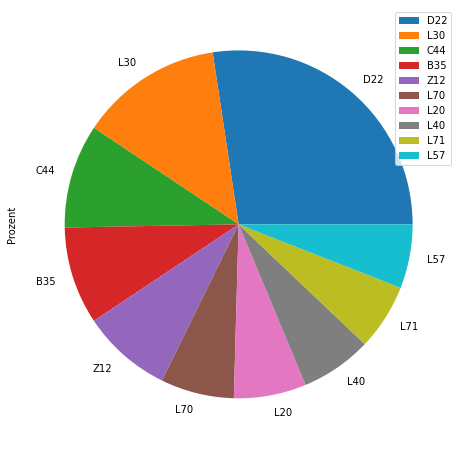

In [69]:
plot = df.plot.pie(y='Prozent', figsize=(8, 8))

# Unsere Statistische Verteilung von Krankheiten

In [25]:
cla = pd.read_csv('third_iteration/third_iteration.csv', sep="|" , skip_blank_lines=True, on_bad_lines='skip', quoting = 3)

In [39]:
cla

Data ICD-10 Code  \
0            superfiziell spreitendes melanom       C43.7   
1                                     M.Bowen       C44.9   
2                          Psoriasis palmaris       L40.-   
3                         Impetigo contagiosa       L01.-   
4                                   Rhinophym       L71.1   
...                                       ...         ...   
4463    Trichophytien /trichophytia  profunda       B35.8   
4464  Ekzemform in verschiedenen Lebensaltern         Z63   
4465                                   Zoster       B02.-   
4466               Keratosen/ Stuccokeratosen       K13.2   
4467                           Tinea corporis       B35.4   

                                     ICD-10 Description  Confidence Score  
0      Malignes superfiziell spreitendes Melanom des...              80.0  
1                                        Bowen-Karzinom              66.4  
2                                             Psoriasis              80.0  
3                                              Impetigo              80.0  
4                                             Rhinophym             100.0  
...                                                 ...               ...  
4463                              Trichophytia profunda              80.0  
4464             Verschwinden eines Familienangehörigen              48.8  
4465                               Zoster Herpes zoster              80.0  
4466                                     Orale Keratose              53.6  
4467                                     Tinea corporis             100.0  

[4468 rows x 4 columns]

In [40]:
len(cla)

4468

In [41]:
short = []
for element in cla["ICD-10 Code"]:
    short.append(str(element)[0:3])

In [42]:
cla["ICD-10 Code"] = short

In [34]:
df2 = pd.DataFrame(data = (cla.where(cla["Confidence Score"] > 90))["ICD-10 Code"].value_counts()[0:10])

In [35]:
(cla.where(cla["Confidence Score"] > 90))["ICD-10 Code"].value_counts()[0:10]

L70    219
L71    102
L30    102
L25     93
L90     61
B35     51
L28     45
L81     33
L27     32
L57     26
Name: ICD-10 Code, dtype: int64

In [36]:
df2

ICD-10 Code
L70          219
L71          102
L30          102
L25           93
L90           61
B35           51
L28           45
L81           33
L27           32
L57           26

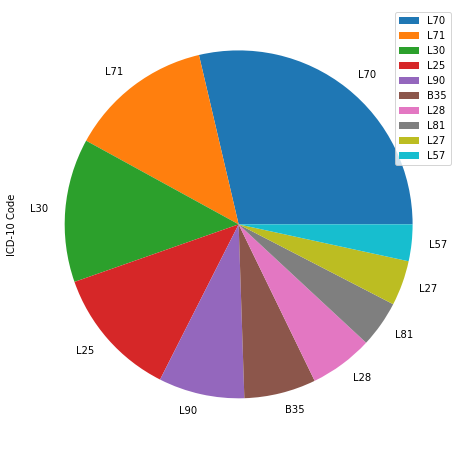

In [37]:
plot = df2.plot.pie(y='ICD-10 Code', figsize=(8, 8))

In [89]:
df2

ICD-10 Code
L70          219
L71          102
L30          102
L25           93
L90           61
B35           51
L28           45
L81           33
L27           32
L57           26

Aufgaben:
- Top 10 Diagnosen + Synonyme für uns zum Überarbeiten und ergänzen
- Code fertig machen zum Testlauf auf der DB (mit Synonymen und Top 10 der nicht klassifizierten Strings)
- Evtl NLP? (Sebastian fragt Robert)
- Später Top 10 nicht klassifizierte Strings noch mit Levenstein Distance
- Validierung von 100-200 Datensätzen aus der DB (für verschiedene Cut-offs, Sensitivität/Spezifität)

Nächste Aufgaben:
- Sebastian schicken, Top 10 Diagnosen schicken - fertig
- NLP -> Groh E-Mail - fertig
- Cut-offs, Sensitivität/Spezifität

# Berechnung Accuracy/Sensitivität/Spezifität

In [ ]:
#https://parasite.id/blog/2018-12-13-model-evaluation/

def calc_avg_accuracy(df, test_df):
    #Calculate average Accuracy
    count = 0
    for clas in unique(df["ICD-10 Code"]):
        #True Positives
        TP = len((df["ICD-10 Code"] == clas) == test_df["ICD-10 Code"])
        #True Negatives
        TN = len((df["ICD-10 Code"] != clas) == test_df["ICD-10 Code"])
        #False Positives
        FP = len((df["ICD-10 Code"] == clas) != test_df["ICD-10 Code"])
        #False Negative
        FN = len((df["ICD-10 Code"] != clas) != test_df["ICD-10 Code"])
        count = count + ((TP + TN) /(TP + TN + FP + FN))
    acc = count / unique(df["ICD-10 Code"])
    return acc
    
def calc_sens(df, test_df): 
    #Calculate average sensitivity 
    count = 0
    for clas in unique(df["ICD-10 Code"]):
        #True Positives
        TP = len((df["ICD-10 Code"] == clas) == test_df["ICD-10 Code"])
        #True Negatives
        TN = len((df["ICD-10 Code"] != clas) == test_df["ICD-10 Code"])
        #False Positives
        FP = len((df["ICD-10 Code"] == clas) != test_df["ICD-10 Code"])
        #False Negative
        FN = len((df["ICD-10 Code"] != clas) != test_df["ICD-10 Code"])
        count = count + (TP/(TP+FN))
    sens = count / unique(df["ICD-10 Code"])
    return sens

def calc_spec(df, test_df): 
    #Calculate average specifity 
    count = 0
    for clas in unique(df["ICD-10 Code"]):
        #True Positives
        TP = len((df["ICD-10 Code"] == clas) == test_df["ICD-10 Code"])
        #True Negatives
        TN = len((df["ICD-10 Code"] != clas) == test_df["ICD-10 Code"])
        #False Positives
        FP = len((df["ICD-10 Code"] == clas) != test_df["ICD-10 Code"])
        #False Negative
        FN = len((df["ICD-10 Code"] != clas) != test_df["ICD-10 Code"])
        count = count + (FP/(FP+FN))
    sens = count / unique(df["ICD-10 Code"])
    return sens

# Multithreading

In [3]:
import threading
import time
import concurrent.futures

In [19]:
start = time.perf_counter()

def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    print(f'Done Sleeping... {seconds}')
    
with concurrent.futures.ThreadPoolExecutor() as executor:
    secs = [5,4,3,2,1]
    results = executor.map(do_something, secs)
    
    for result in results:
        print(result)
        
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 5 second(s)...
Sleeping 4 second(s)...
Sleeping 3 second(s)...
Sleeping 2 second(s)...
Sleeping 1 second(s)...
Done Sleeping... 1
Done Sleeping... 2
Done Sleeping... 3
Done Sleeping... 4
Done Sleeping... 5
None
None
None
None
None
Finished in 5.01 second(s)


# Multiprocessing: We need to use multiprocessing, since our task is CPU-bound. Multithreading is helpful when we are IO-bound!

In [29]:
import multiprocessing
import time
import defs
%reload_ext autoreload
%autoreload 2

In [78]:
start = time.perf_counter()

processes = []
    
for _ in range(10):
    p = multiprocessing.Process(target=defs.do_something, args = [2])
    p.start()
    processes.append(p)
    
for process in processes:
    process.join()
    

finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 3.5 second(s)


In [3]:
import concurrent.futures

In [80]:
start = time.perf_counter()

with concurrent.futures.ProcessPoolExecutor() as executor:
    secs = [5,4,3,2,1]
    results = executor.map(defs.do_something, secs)
    
    for result in results:
        print(result)


finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Done Sleeping... 5
Done Sleeping... 4
Done Sleeping... 3
Done Sleeping... 2
Done Sleeping... 1
Finished in 5.95 second(s)


# Multiprocessing with our fourth iteration algorithm

In [27]:
import concurrent.futures

In [31]:
start = time.perf_counter()

with concurrent.futures.ProcessPoolExecutor() as executor:
    secs = [0]
    results = executor.map(defs.fourth_match, secs)
    
    for result in results:
        df = pd.DataFrame(result, columns=['Data', 'ICD-10', 'Confidence Score'])
        compression_opts = dict(method='zip', archive_name='fourth_iteration.csv')  
        with open('fourth_iteration.csv', 'a') as f:
            df.to_csv(f, header=False, compression=compression_opts, sep = "|", index=False, line_terminator='\n')


finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')
#We can divide the runtime by the number of available cores on our CPU!
#We need for 40 entries ~120 seconds! -> 3 seconds per entry

Finished in 248.5 second(s)


C:\Users\fabia\AppData\Local\Temp\ipykernel_7716\1803046913.py:11: RuntimeWarning: compression has no effect when passing a non-binary object as input.
  df.to_csv(f, header=False, compression=compression_opts, sep = "|", index=False, line_terminator='\n')


# Graphiken

In [2]:
names = ["Index", "Krankheit", "ICD-10", "Confidence measure"]

In [3]:
data = pd.read_csv('KAP_update/final_result_whole.csv', sep="|", skip_blank_lines=True, names = names)

In [4]:
data = data.dropna()

In [5]:
data

Index                                        Krankheit  \
0       1106                  Erythema exsudativum multiforme   
1       1107                                     Ulcus cruris   
3       1109  präputiale synedien? bei lichen ruber annularis   
4       1110                                 Basaliom nach OP   
5       1111                          anbeh.Rumpfhautbasliome   
...      ...                                              ...   
50395  57286                                               AE   
50396  57287                             Seborrohisches Ekzem   
50397  57288                          Lentigo der Schleimhaut   
50398  57289                                               VK   
50399  57290                   V. a. Lipom, DD Epidermalzyste   

                                                  ICD-10 Confidence measure  
0                 L51.-, Erythema exsudativum multiforme            100.0;;  
1      L97, Ulcus cruris, anderenorts nicht klassifiz...            100.0;;  
3                                          L28.0, Lichen            100.0;;  
4                                        C44.9, Basaliom            100.0;;  
5                               C44.5, Rumpfhautbasaliom             80.0;;  
...                                                  ...                ...  
50395                                          T78.3, AE            100.0;;  
50396                                       L30.9, Ekzem            100.0;;  
50397                                     L81.4, Lentigo            100.0;;  
50398                                         I73.9, AVK             80.0;;  
50399                              L72.0, Epidermalzyste            100.0;;  

[49496 rows x 4 columns]

In [6]:
df = data["ICD-10"]

In [7]:
df = df.values.tolist()

In [8]:
df

['L51.-, Erythema exsudativum multiforme',
 'L97, Ulcus cruris, anderenorts nicht klassifiziert',
 'L28.0, Lichen',
 'C44.9, Basaliom',
 'C44.5, Rumpfhautbasaliom',
 'L44.1, Lichen nitidus',
 'L20.8, Neurodermitis',
 'L30.9, Dermatitis',
 'L81.8, Tätowierung',
 'B02.9, Zoster',
 'L70.1, Acne conglobata',
 'L97, Ulcus cruris, anderenorts nicht klassifiziert',
 'L25.9, Kontaktekzem',
 'L28.0, Lichen',
 'B02.9, Zoster',
 'I77.6, Vasculitis',
 'C92.00, AML1/ETO',
 'C92.00, AML1/ETO',
 'A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex',
 'M35.0,  Sicca-Symptomatik ',
 'L23.9, Allergisches Kontaktekzem',
 'O43.21, Placenta increta als Entbindungskomplikation ohne Blutung',
 'C43.9, Melanom',
 'L30.1, Dyshidrosiformes Hand- und Fußekzem',
 'B35.9, Tinea',
 'D22.9, Tierfellnävus',
 'B35.9, Mikrosporie',
 'D04.1, Morbus Bowen des Lids',
 'L20.8, Neurodermitis',
 'A63.0, Condylomata',
 'L73.9, Folliculitis',
 'Q51.8, Kongenitale Verlagerung von Plattenepithel in den Ze

In [9]:
for element in df:
    print(element)
    element = element.split(",", 1)

L51.-, Erythema exsudativum multiforme
L97, Ulcus cruris, anderenorts nicht klassifiziert
L28.0, Lichen
C44.9, Basaliom
C44.5, Rumpfhautbasaliom
L44.1, Lichen nitidus
L20.8, Neurodermitis
L30.9, Dermatitis
L81.8, Tätowierung
B02.9, Zoster
L70.1, Acne conglobata
L97, Ulcus cruris, anderenorts nicht klassifiziert
L25.9, Kontaktekzem
L28.0, Lichen
B02.9, Zoster
I77.6, Vasculitis
C92.00, AML1/ETO
C92.00, AML1/ETO
A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex
M35.0,  Sicca-Symptomatik 
L23.9, Allergisches Kontaktekzem
O43.21, Placenta increta als Entbindungskomplikation ohne Blutung
C43.9, Melanom
L30.1, Dyshidrosiformes Hand- und Fußekzem
B35.9, Tinea
D22.9, Tierfellnävus
B35.9, Mikrosporie
D04.1, Morbus Bowen des Lids
L20.8, Neurodermitis
A63.0, Condylomata
L73.9, Folliculitis
Q51.8, Kongenitale Verlagerung von Plattenepithel in den Zervikalkanal
L28.0, Lichen
A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex
L81.8, Tätowierung
A63.0

A51.4, Lues II
I83.9, Retikuläre Varikose
L50.3, Urticaria factitia
B86, Scabies
L53.9, Erythrodermie
D04.1, Morbus Bowen des Lids
L43.-, Lichen ruber planus
B08.0, Melkerknoten
B08.0, Melkerknoten
L40.-, Psoriasis
G51.2, Melkersson-Rosenthal-Syndrom
U69.10!, Anderenorts klassifizierte Krankheit, für die der Verdacht besteht, dass sie Folge einer medizinisch nicht indizierten ästhetischen Operation, einer Tätowierung oder eines Piercings ist
A63.0,  Bowenoide Papulose 
L30.9, Dermatitis
L30.9, Dermatitis
L71.8, Rosacea erythematosa
D22.9, Naevus
L12.0, Alterspemphigus
B35.1, Onychomykose
L73.9, Follikulitis
L60.0, Unguis incarnatus
L28.0, Lichen
L30.9, Analekzem
D04.9, M. Bowen
I83.1, Varikophlebitis
B08.0, Schafpocken
L92.1, Necrobiosis lipoidica
K14.3, Lingua villosa
B37.2, Candida-Ekzem
G08, Intrakranielle und intraspinale Phlebitis und Thrombophlebitis
I83.1, Stauungsdermatitis
B35.4, Tinea corporis
L23.9, Kontaktallergie
B00.0, Ekzema herpeticatum Kaposi
D04.9, M. Bowen
Q83.3, Akz

L27.0, Arzneimittelexanthem
B02.9, Zoster
C84.1, Sézary-Syndrom
B02.-, Zoster Herpes zoster
I67.88+, Weber-Syndrom
L20.8, Neurodermitis
L98.4, Ulcus
L56.4, Spring Perniosis
R23.8, Bulla
L40.-, Psoriasis
L30.8, Halo-Dermatitis um Naevuszellnaevi
A51.2,  Ulcer durum 
D22.9, Naevus
I78.0, Morbus Osler
A31.9, NTM
L28.2, Prurigo
I78.0, Morbus Osler
A51.2,  Ulcer durum 
L41.-, Parapsoriasis
B76.9, Creeping disease
L20.8, Neurodermitis
T14.05, Hämatom
Q82.2, Mastozytose
L20.8, Neurodermitis
L43.-, Lichen ruber planus
I77.6, Vasculitis
L25.9, Kontaktekzem
A46, Erysipel Wundrose
L10.0, Pemphigus vulgaris
E80.1, Porphyria cutanea tarda
L20.8, Neurodermitis
I77.6, Vasculitis
B07, Verruca vulgaris
L30.8, Halo-Dermatitis um Naevuszellnaevi
L40.-, Psoriasis
D22.9, Tierfellnävus
L28.0, Lichen
L20.8, Neurodermitis
L98.1,  Artefakte 
B76.9, Creeping disease
L21.-, Seborrhoisches Ekzem
D69.0, Vasculitis allergica
C43.9, Malignes Melanom
L90.5, Narbengranulom
L25.9, Kontaktekzem
L01.-, Impetigo
L98.4, Ul

Q54.-, Hypospadie
L50.3, Urticaria factitia
L90.8, Pseudoxanthoma elasticum-ähnliche papilläre dermale Elastolyse
L57.0, Keratoma
Q78.5, Knorpel-Haar-Hypoplasie
B00.0, Ekzema herpeticatum Kaposi
C80.9, Plattenepithelkarzinom
L73.9, Ostiofolliculitis
D22.9, Naevus
L80, Vitiligo
L30.9, Eczema
D22.9, Naevus
B07, Warze
D22.9, Halo-Nävus
L20.8, Neurodermitis
L23.5, Allergie gegen Pflaster
L40.-, Psoriasis
K13.2,  Leukoplakie 
S02.2, Nasenbeinfraktur
L20.8, Neurodermitis
R80, Bence-Jones-Albuminurie a.n.k.
L98.4, Ulcus
L30.9, Dermatitis
D18.0-, Hämangiom
L97, Ulcus cruris, anderenorts nicht klassifiziert
C44.3, Basaliom des medialen Jochbogens
A26.0, Erythema migrans
L28.0, Lichen
D22.9, Nävus
L20.8, Neurodermitis
L40.-, Psoriasis
B35.9, Trichophytie
L81.4, Lentigo
L81.4, Lentigo
L40.-, Psoriasis
L28.0, Lichen
D22.-, Naevuszellnaevus
D22.9, Naevus
L40.-, Psoriasis
Q82.5, Familiäre multiple Naevi flammei
L57.1, Aktinisches Retikuloid
L20.8, Neurodermitis
C43.9, Naevus malignus
L98.8, Lymphozy

L30.9, Ekzem
L66.0, Pseudopelade Brocq
D22.-, Naevuszellnaevus
A46, Erysipel
D16.5, Epithelialer Tumor
D17.9, Fibroma pendulans
B35.9, Tinea
D22.9, Naevus
D22.9, Naevus
L94.1, Lineare oder bandförmige Sklerodermie
L64.-, Alopecia androgenetica
E78.9, Lipoproteinstoffwechselstörung
O34.30, Betreuung der Mutter bei vaginalsonographisch dokumentierter Zervixlänge unter 10 mm oder Trichterbildung
D22.9, Naevus
L30.9, Handekzem
C84.6, Anaplastisches großzelliges Lymphom ALK-positiv (ALCL, ALK+) , nan
L98.0, Granuloma pediculatum Granuloma pyogenicum
Q05.9, Spinale Meningozele
L68.1, Hypertrichosis lanuginosa acquisita
K14.5, Lingua plicata
D22.9, Naevus
L25.9, Kontaktekzem
L30.9, Dermatitis
C43.9, Bösartiges akrolentiginöses Melanom
T14.01, Abrasion
L81.8, Tattoo
L28.1, Prurigo nodularis
L50.9, Urticaria
L50.3, Dermographismus
L43.-, Lichen ruber planus
C84.6, Anaplastisches großzelliges Lymphom ALK-positiv (ALCL, ALK+) , nan
L57.0, Keratose
B24, AIDS
C46.-, Kaposi-Sarkom Sarcoma idiopathic

D22.9, Naevus
C44.9, Basaliom
L20.8, Neurodermitis
L51.9, Erythema multiforme
L40.-, Psoriasis
D69.0, Vasculitis allergica
L40.-, Psoriasis
C84.6, Anaplastisches großzelliges Lymphom ALK-positiv (ALCL, ALK+) , nan
C84.6, Anaplastisches großzelliges Lymphom ALK-positiv (ALCL, ALK+) , nan
C84.4, T-Zell-Lymphom a.n.k.
L50.9, Urticaria
C44.9, Basaliom
J84.0, PAP
L40.-, Psoriasis
L97, Ulcus cruris, anderenorts nicht klassifiziert
B00.9, Herpes
L63.8, Alopezia areata
H33.2, Ablatio retinae
L40.-, Psoriasis
C84.0, Mycosis fungoides
L97, Ulcus cruris, anderenorts nicht klassifiziert
L50.9, Urticaria
B35.1, Onychomykose
L60.3, Onychodystrophie
L73.9, Follikulitis
L20.8, Disseminierte Neurodermitis
L95.1, Erythema elevatum et diutinum
L20.8, Disseminierte Neurodermitis
C46.9, Kaposi-Sarkom
B35.1, Nagelmykose
L23.9, Allergisches Kontaktekzem
L92.9, Granulom
B73, Onchozerkose
L30.9, Ekzem
C79.88, Metastase an den Perineumnerven a.n.k.
I25.19, Kardiales Atherom
Q82.2, SSM
L40.-, Psoriasis
O08.2, Se

L40.0, Psoriasis vulgaris
D22.9, Naevus
L50.9, Urticaria
L53.9, Erythema
L30.9, Dermatitis
L41.-, Parapsoriasis
C44.6, Karzinom der Haut der Schulter
L97, Ulcus cruris, anderenorts nicht klassifiziert
L88, Pyoderma gangraenosum
L20.8, Disseminierte Neurodermitis
B00.1, Herpes labialis
L40.0, Psoriasis vulgaris
L40.0, Psoriasis vulgaris
A26.0, Erythema migrans
L20.8, Disseminierte Neurodermitis
D18.0-, Hämangiom
L08.0, Pyodermie
D47.2, TEMPI Teleangiektasien, erhöhte Erythropoetinkonzentration, monoklonale Gammopathie, perinephritischer Abszess, intrapulmonaler Shunt-Syndrom
C18.9, Malignes Melanom des Dickdarms
L25.9, Kontaktekzem
G08, Intrakranielle und intraspinale Phlebitis und Thrombophlebitis
L44.2, Lichen striatus
T78.8,  Bienengiftallergie 
D48.9, Neoplasie
H17.9, Korneanarbe
Q85.8, Gorlin-Goltz-Syndrom
C44.3, Basaliom des medialen Jochbogens
L40.0, Psoriasis vulgaris
L23.9, Allergisches Kontaktekzem
L30.9, Hautekzem
C18.9, Malignes Melanom des Dickdarms
D22.9, Naevus
E80.1, Por

D81.4, Hypo-?-Globulinämie
M33.1, Dermatomyositis
L20.9, Atopisches Ekzem
T78.1,  Curryallergie 
T78.4, Atopie
L30.8, Acrodermatitis
D18.0-, Hämangiom
O26.4, Herpes gestationis
C44.9, Basaliom
L27.0, Arzneimittelexanthem
N34.2,  Mykoplasmenurethritis 
C81.9, Hodgkin-Lymphom
L70.-, Akne
L27.0, Arzneimittelexanthem
L60.1, Onycholyse
C41.9+, Osteosarkom bei Paget-Krankheit des Knochens
D73.3, Abszess der Milz
I89.09, Elephantiasis
L85.8, Familiäres Keratoakanthom
M35.6, Rezidivierende Pannikulitis Pfeifer-Weber-Christian-Krankheit
D00.0, Carcinoma in situ der hinteren Wand des Hypopharynx
L27.0, Arzneimittelexanthem
I77.6, Vasculitis
R60.9, Ödem
L63.-, Alopecia areata
L28.0, Lichen
B36.0, Pityriasis versicolor
D69.0, Vasculitis allergica
L93.0, CDLE
Z02, Untersuchung zur Teilnahme am Sport
L60.3, Onychodystrophie
M72.1, Fingerknöchelpolster Knuckle pads
Z51.9, Therapie
B02.-, Zoster Herpes zoster
C44.9, Ulcus rodens
D22.9, Naevus
I77.6, Vasculitis
D03.9, Lentigo maligna
R60.9, Ödem
L30.2,

D68.6, Antiphospholipidsyndrom
Q82.8, Diffuse neonatale Hämangiomatose
L43.2, Lichenoide Arzneimittelexantheme
D17.0, Lipome
T00.9, Cimicosis
D22.9, Naevus
L23.-, Wiesengrasdermatitis
Q28.19, Anomalie der Arteria vertebralis a.n.k.
K00.9, Zahnanomalie
L30.9, Dermatitis
C43.9, Melanom
B48.0, Keloid-Blastomykose
B02.9, Zoster
B35.3, Fußmykose
L70.9, Acne
L28.0, Lichen
Z51.9, Therapie
B55.9, Leishmaniasis
D03.9, Lentigo maligna
B35.9, Tinea
A26.0, Erythema migrans
B35.4, Tinea corporis
C44.9, Basaliom
Q10.3, Distichiasis
L25.9, Kontaktdermatitis
Q10.3, Distichiasis
L74.4, HSAN Typ IV
L74.4, HSAN Typ IV
A18.4, Primäre tuberkulöse Paronychie
C79.5, Knorpelmetastase a.n.k.
L25.9, Kontaktekzem
L97, Ulcus cruris, anderenorts nicht klassifiziert
L57.2, Aktinische Elastose
L74.4, HSAN Typ IV
L20.9, Atopisches Ekzem
B37.9, Candida-Superinfektion
L42, Pityriasis rosea
I80.28, Tiefe Beinvenenthrombose
L30.2, Id-Reaktion
D21.9, Haemangiopericytoma benigna
L73.9, Folliculitis
L25.9, Kontaktekzem
L80,

L21.-, Seborrhoisches Ekzem
C81.-, Hodgkin-Lymphom Lymphogranulomatose
C80.9, Bösartige Neubildung unklarer Genese
L40.-, Psoriasis
A26.0, Erythema migrans
F44.9, Konversionsreaktion
B07, Verrucae
B55.9, Leishmaniasis
D47.0, Mastozytom
E75.5, Hereditäre Hyperlipidosis a.n.k.
K62.9,  Anal erosion 
L40.-, Psoriasis
B35.1, Onychomykose
D23.4, Spiegler-Tumoren
L30.5, Pityriasis alba faciei
C44.9, Basaliom
L44.1, Lichen nitidus
D18.01, Haemangiom seniles
P36.4, Kongenitale Sepsis durch Escherichia coli
L80, Vitiligo
L97, Ulcus cruris
L93.1,  Scle 
D22.9, Naevus
L56.2, Phototoxische Dermatitis
C44.9, Spinaliom der Haut Plattenepithelkarzinom
L28.-, Lichen simplex chronicus und Prurigo
L40.-, Psoriasis
L97, Ulcus cruris, anderenorts nicht klassifiziert
L63.-, Alopecia areata
L44.2, Blaschkitis
C80.9, Spinaliom
L80, Vitiligo
C44.9, Basaliom
C44.9, Spinaliom der Haut Plattenepithelkarzinom
C44.9, Basaliom
L57.0, Aktinische Keratose
L01.-, Impetigo
B00.9, Herpes
D18.01, Angiokeratoma corporis ci

U69.10!, Anderenorts klassifizierte Krankheit, für die der Verdacht besteht, dass sie Folge einer medizinisch nicht indizierten ästhetischen Operation, einer Tätowierung oder eines Piercings ist
A63.0, Condylomata
L40.-, Psoriasis
L90.8, Anetodermie
L28.0, Lichen
A51.4, Lues II
L80, Vitiligo
B07, Epidermodysplasia verruciformis
L40.8, Nagelpsoriasis
B83.0, Larva migrans visceralis
B01.9, Varizellen
L98.8, Borrelien-Lymphozytom
L85.8, Familiäres Keratoakanthom
Q75.8, Basale Impression
L28.0, Lichen
L40.-, Psoriasis
A26.0, Erythema migrans
B07, Verrucae
L28.0, Lichen
B08.1, Mollusca contagiosa
T78.4, Atopie
L81.1, Chloasma Melasma
L98.9, Dermatose
D69.2,  Hämorrhagisch pigmentäre Dermatosen 
L80, Vitiligo
L13.0, Dermatitis herpetiformis Duhring
L30.8, Acrodermatitis
T78.2, Anaphylaktische Reaktion
B02.9, Zoster
G04.8, Myeloradikulitis
L98.4, Ulcus
L40.-, Psoriasis
L40.-, Psoriasis
L71.8, Rosacea erythematosa
L20.-, Atopisches endogenes Ekzem
C51.9, Vulvamelanom
L81.8, Hypopigmentierung
C

R23.1, Livedo
B07, Verrucae
C43.9, Melanom
L88, Pyoderma gangraenosum
L71.9, Rosacea
L23.9, Allergisches Kontaktekzem
A63.0, Condylomata
B99, Infektion
L97, Ulcus cruris
L20.9, Atopisches Ekzem
L90.0, LSA
L53.9, Erythem
D43.2, Gangliogliom
L80, Vitiligo
E70.3, Waardenburg-Syndrom
L92.0, Granuloma anulare
D22.9, Dermaler Nävus
B02.9, Zoster
C43.9, Melanom
D22.-, Kongenitaler Naevuszellnaevus
D22.9, Naevus
L71.9, Rosacea
D24, Gutartiger Mammatumor
L80, Vitiligo
C46.9, Kaposi-Sarkom
L71.9, Rosacea
L93.-, Lupus erythematodes
C84.0, Mycosis fungoides
L28.0, Lichen
L71.9, Rosacea
L25.9, Kontaktekzem
A63.0, Condylomata
F10.1,  Alkohol Hautveränderungen 
L82, Dermatosis papulosa nigra
L50.9, Urticaria
I77.6, Arteriitis
A46, Erysipel
L28.0, Lichen
L71.9, Rosacea
L71.9, Rosacea
R21, Exanthem
L71.0, Periorale Dermatitis
F80.28, Entwicklungsbedingte Aphasie
L71.0, Periorale Dermatitis
L80, Vitiligo
L70.0, Acne cystica
L80, Vitiligo
L93.2, Lymphocytic infiltration of the skin
C43.9, Melanom
L50.9, 

L12.9, Pemphigoid
C44.9, Basaliom
L20.8,  Lippenleckekzem 
M67.49, Hygrom
L30.9, Ekzem
L30.9, Ekzem
D76.3, H-Syndrom
C84.8, CTCL
D21.9, Leiomyom
L42, Pityriasis rosea
L08.0, Pyodermie
D72.1, Hypereosinophilie
B00.9, Herpes
L98.8, Lymphozytom
D22.9, Naevus
L08.0, Pyodermie
L13.0, Dermatitis herpetiformis Duhring
C83.0, Kleinzelliges B-Zell-Lymphom
M34.0, Scleroderma
D23.4,  Zylindrom 
J18.9, Retentionspneumonie
L23.9, Allergisches Kontaktekzem
Q82.2, Mastozytose
L50.9, Urticaria
R23.8, Hautveränderung
L21.0, Pityriasis
D72.1, Hypereosinophilie
E80.1, Porphyria cutanea tarda
L13.0, Dermatitis herpetiformis Duhring
L70.5, Acne excoriée
L94.0, Morphea
Q81.-, Epidermolysis bullosa
L59.0, Erythema ab igne
B35.4, Tinea corporis
Q82.2, SSM
L30.9, Dermatitis
L40.3, Pustulosis palmaris et plantaris
H01.1, Lidekzem
L40.-, Psoriasis
L60.3, Onychodystrophie
L41.5, Parapsoriasis mit Poikilodermie
D72.1, Hypereosinophilie
L23.9, Allergisches Kontaktekzem
D22.9, Epidermaler Nävus
E13.90, Diabetes mell

D03.9, Lentigo maligna
B68.0, Befall durch Taenia solium
A52.3, Gehirnlues
L30.9, Ekzem
E88.1, Lipoatrophie
Z51.9, Therapie
M20.0,  Fingerkontraktur 
L50.9, Urticaria
L83, Papillomatosis confluens et reticularis
L56.8, Hidroa aestivalia
C44.9, Basaliom
L57.0, Aktinische Keratosen
L30.9, Ekzem
D22.9, Naevus
D22.9, Naevus
M72.2, Ledderhose M.
C84.8, Kutanes Lymphom
I78.9, Solitary and multiple angiokeratomas.
L50.9, Urticaria
M72.2, Ledderhose M.
C43.-, Bösartiges Melanom der Haut
C91.00,  All 
L50.9, Urticaria
C85.9, Lymphom
Q67.0, Gesichtsasymmetrie
C43.9, Melanom
L30.9, Ekzem
L58.1, Radioderm
I73.8, Erythromelalgie
L85.8, Keratoakanthom
C85.9, Lymphom
Q82.8, Morbus Darier
T14.9, Trauma
L92.2, Granuloma eosinophilicum faciei
B78.1+, Hautstrongyloidiasis
C85.9, Lymphom
T69.8,  Submental congelative induration 
C80.0, Bösartiger Tumor unklarer Lokalisation
C43.9, Melanom
D22.9, Naevus
L30.9, Ekzem
T30.0, Verbrennung
G90.00, Carotid sinus syncope
C84.0, MF
M20.0,  Fingerkontraktur 
L01.-,

L20.9, Atopisches Ekzem
K14.3, Lingua villosa
D48.5, Dysplastic nevus
D03.9, Lentigo maligna
L93.-, LE
L20.9, Atopisches Ekzem
L50.-, Urtikaria
L27.0, Kutane UAW
L20.-, Atopisches endogenes Ekzem
Q82.2, SSM
L90.3, Morphea plana atrophicans
C44.9, Basaliom
D48.5, Dysplastic nevus
B08.1, Mollusca contagiosa
G90.00, Carotid sinus syncope
A51.0, Lues I
M33.1, Dermatomyositis
L70.4, Acne infantum
L20.-, Atopisches endogenes Ekzem
L50.9, Urticaria
L50.9, Urticaria
L30.9, Handekzem
Q82.2, SSM
L20.9, Atopisches Ekzem
C44.-, BCC
M14.49*, Arthropathie bei Amyloidose: Nicht näher bezeichnete Lokalisation
L27.2,  Fischallergie 
L94.1, Lineare oder bandförmige Sklerodermie
C43.9, Amelanotisches Melanom
L20.9, Atopisches Ekzem
L40.8, Nagelpsoriasis
B36.1, tinea nigra
L93.-, Lupus erythematodes
K14.1, Lingua geographica
L51.0, EEM
L30.9, Ekzem
L01.-, Impetigo
B02.9, Zoster
B08.0, Cowpox
D03.9, Melanoma in situ der Haut a.n.k.
C44.9, Basaliom
D17.9, Lipom
M72.0, Morbus Dupuytren
C44.-, BCC
M72.-, kong

L30.9, Ekzem
I78.1,  Nevus araneus 
Q82.2, SSM
C84.6, Anaplastisches großzelliges Lymphom ALK-positiv (ALCL, ALK+) , nan
D18.-, Hämangiom und Lymphangiom
L24.4, Toxisches Exanthem durch Hautkontakt mit Arzneimittel
L20.8, Ekzema infantum
I77.6, Vasculitis
C44.-, SCC
C44.9, Spinaliom der Haut Plattenepithelkarzinom
L40.-, Psoriasis
T78.4, Allergie, nicht näher bezeichnet
L40.-, Psoriasis
C43.9, Melanom
R21, Exanthem
L71.9, Rosacea
L41.0, PLEVA
L30.9, Ekzem
L25.9, Kontaktekzem
L71.9, Rosacea
D00.0, Carcinoma in situ der Zungenmittellinie a.n.k.
C44.-, BCC
Q82.8, Keratodermie
C44.9, Basaliom
L27.0, Arzneimittelexanthem
Q82.2, Mastozytose
L90.0, LSA
L50.3, Urticaria factitia
L30.0, Nummuläres Ekzem
L85.8, Darier M. isolierter
A57, Ulcus molle (venereum)
L98.9, Dermatose
D04.9, M. Bowen
B49, Mykose
M30.8, Polyangiitis-Overlap-Syndrom
N10, Akute bilaterale Pyelonephritis
D03.9, Bösartige Lentigo
L66.2, Folliculitis decalvans
B36.9, Oberflächliche Mykose, nicht näher bezeichnet
B36.9, Flechte

T78.3, AE
L57.0, Aktinische Keratosen
G51.2, Melkersson-Rosenthal-Syndrom
M34.9, Sklerodermie
L01.-, Impetigo
D22.9, Naevus
K11.2, Eitrige Adenitis der Parotis
L65.9, Hypotrichose
L30.9, Ekzem
L30.9, Ekzem
D72.1, HES
L63.-, Alopecia areata
B35.9, Tinea
L28.2, Prurigo
L94.1, Lineare oder bandförmige Sklerodermie
L30.9, Ekzem
D22.9, Naevus
K11.2, Eitrige Adenitis der Parotis
I77.6, Vasculitis
L81.4, Lentigo
L40.-, Psoriasis
H59.8, Blutung nach Lid-OP Operation
B86, Scabies
L50.4, Vibrationsurtikaria
C49.9, Sarkom
M35.0,  Sicca-Symptomatik 
K12.0, Aphthen
T78.3, AE
L30.1, Dyshidrosiformes Hand- und Fußekzem
R23.4, Parakeratose
L30.9, Ekzem
L88, Pyoderma gangraenosum
L92.0, Granuloma anulare
L30.9, Handekzem
L25.9, Kontaktekzem
E87.7,  Dilution hyponatremia 
M72.0, Morbus Dupuytren
M72.0, Morbus Dupuytren
C44.9, Basaliom
M72.0, Morbus Dupuytren
D22.9, Naevus
B36.9, Flechte
T78.0, FDEIA
L81.4, Melanosis
L71.-, Rosazea
B36.9, Flechte
B35.0, Tinea capitis
C80.9, Spinaliom
L30.0, Nummuläres Ek

L71.-, Rosazea
B09, Virusexanthem
L28.2, Prurigo
L72.0, Epidermalzyste
L20.9, Atopisches Ekzem
I77.6, Vasculitis
L27.0, Arzneimittelexanthem
L89.99, Dekubitus
B07, Verruca
L93.-, Lupus erythematodes
L92.1, Necrobiosis lipoidica
L88, Pyoderma gangraenosum
L70.0, Acne nodosa
B09, Virusexanthem
L27.0, Arzneimittelexanthem
L40.-, Psoriasis
B08.4, Hand-Fuß-Mund-Krankheit
R58, Einblutung
L67.1, Canities
D23.4,  Zylindrom 
L23.9, Allergisches Kontaktekzem
Q82.2, Mastozytose
L12.0, Bullöses Pemphigoid
D22.9, Naevus
L12.0, Bullöses Pemphigoid
L70.0, Acne papulopustulosa
L08.0, Pyodermie
L27.2, Th a 2
D22.9, Naevus
Q82.2, Mastozytose
L13.0, Morbus Duhring
L13.0, Morbus Duhring
L70.9, Acne
L80, Vitiligo
L27.0, Arzneimittelexanthem
L30.9, Dermatitis
L41.-, Parapsoriasis
B36.0, Pityriasis versicolor
D21.9, Fibrom
L71.-, Rosazea
L30.0, Nummuläres Ekzem
L57.0, Keratosis
G90.00, Carotid sinus syncope
L53.9, Erythema
L27.0, Arzneimittelexanthem
B02.9, Zoster
L50.9, Urticaria
L74.4, HSAN Typ IV
C43.9, M

Q82.8, Disseminierte superfizielle aktinische Porokeratose
H61.0, Ear nodules painful
L90.0, LSA
L51.2-, Toxische epidermale Nekrolyse Lyell-Syndrom
L40.-, Psoriasis
L51.1, Stevens-Johnson-Syndrom
B35.4, Tinea corporis
Q82.8, Disseminierte superfizielle aktinische Porokeratose
A53.9, Lues
L28.0, Lichen
D47.0, Mastozytom
L30.9, Dermatitis
L51.20, TEN Toxische epidermale Nekrolyse
B02.9, Zoster
L97, Ulcus cruris
Q26.6, Fistel zwischen V. portae und A. hepatica (angeboren)
L57.0, Aktinische Keratose
L20.-, Atopisches endogenes Ekzem
L30.9, Ekzem
L40.-, Psoriasis
L28.0, Lichen
L95.-, Anderenorts nicht klassifizierte Vaskulitis, die auf die Haut begrenzt ist
C44.9, Basaliom
L30.1, Dyshidrosiformes Fußekzem
T14.05, Hämatom
L40.-, Psoriasis
L40.-, Psoriasis
L70.0, Acne vulgaris
D34, Follikuläres Adenom
F63.3, Alopecie par grattage
M72.0, Morbus Dupuytren
L12.0, Bullöses Pemphigoid
L20.9, Atopisches Ekzem
A16.9, Tuberculosis
L97, Ulcus cruris, anderenorts nicht klassifiziert
L68.-, Hypertricho

L60.5, Yellow-nail-Syndrom
L88, Pyoderma gangränosum
L88, Pyoderma gangränosum
L24.4, Toxisches Exanthem durch Hautkontakt mit Arzneimittel
B36.9, Flechte
I37.1, PI
L98.4, Ulcus
L40.-, Psoriasis
Q84.8, Aplasia cutis congenita
O34.30, Betreuung der Mutter bei vaginalsonographisch dokumentierter Zervixlänge unter 10 mm oder Trichterbildung
B35.4, Tinea corporis
L30.9, Ekzem
L88, Pyoderma gangränosum
A52.3, Gehirnlues
D18.0-, Hämangiom
D38.6, Unsichere Neubildung der Respirationsorgane a.n.k.
M72.0, Morbus Dupuytren
D86.-, Sarkoidose
M72.2, Ledderhose M.
L81.3, Cafe-au-lait-Flecken
L21.0, Pityriasis
I77.6, Vaskulitis
L28.0, Lichen
D86.-, Sarkoidose
B07, Verruca
A46, Erysipel
L27.0, Arzneimittelexanthem
B35.0, Tinea barbae und Tinea capitis
L44.1, Lichen nitidus
L98.4, Ulcus
L72.0, Retentionszyste
L66.2, Folliculitis decalvans
B88.9,  Epizoonosen (Übersicht) 
B47.-, Myzetom
T78.3, AE
L43.-, Lichen ruber planus
L92.0, Granuloma anulare
L93.-, Lupus erythematodes
C44.-, BCC
L28.0, Lichen
L53

L65.9, Alopezie
I73.9, AVK
Q13.0, Coloboma
D22.9, Naevus
I73.9, AVK
L88, Pyoderma gangränosum
B35.1, Onychomykose
L81.8, Dyschromatosis symmetrica hereditaria
S31.80, Lazeration des Septum rectovaginale
L65.9, Alopezie
L71.8, IFAG
B00.0, Ekzema herpeticatum Kaposi
L30.8, Hyperkeratotisches Ekzem
L80, Vitiligo
Q28.88, Malformation vaskuläre
L23.9, Allergisches Kontaktekzem
L66.1, Lichen planopilaris
L30.0, Nummuläres Ekzem
L12.0, Bullöses Pemphigoid
D04.9, M. Bowen
L70.9, Acne
L44.0, PRP
M72.0, Morbus Dupuytren
M72.0, Morbus Dupuytren
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
L40.-, Psoriasis
M72.0, Morbus Dupuytren
O34.30, Betreuung der Mutter bei vaginalsonographisch dokumentierter Zervixlänge unter 10 mm oder Trichterbildung
L20.8, Atopisches Handekzem
L66.1, Lichen planopilaris
L85.3, Xerosis cutis
C43.4, Malignes Melanom der behaarten Kopfhaut
L95.0, Livedovaskulopathie
L57.0, Keratosis
C44.-, SCC
C43.9, Melanom
I80.81, Thrombose der Vena subclavia
M72.0, Fibromatose

L92.0, Granuloma anulare
D18.0-, Hämangiom
L85.8, Keratoakanthom
L27.0, Arzneimittelexanthem
L88, Pyoderma gangraenosum
T78.3, AE
Q82.8, Gougerot-Hailey-Hailey-Syndrom
B35.1, Onychomykose
L68.0, Hirsutismus
A46, Erysipel
A52.3, Gehirnlues
L28.0, Lichen
L40.-, Psoriasis
L60.8,  Melanonychia striata 
C85.9, Lymphom
L92.0, Granuloma anulare
C49.9, Sarkom
L97, Ulcus cruris
R21, Exanthem
B48.0, Keloid-Blastomykose
C44.-, BCC
L40.-, Psoriasis
I77.6, Vaskulitis
L40.-, Psoriasis
A51.2,  Ulcer durum 
L97, Ulcus cruris
M34.-, Systemische Sklerose
M34.1, CREST-Syndrom Spezialform der progressiven systemischen Sklerose mit Calcinosis cutis, Raynaud-Phänomen, Ösophagusdysfunktion, Sklerodaktylie und Teleangiektasie
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
K13.2,  Leukoplakie 
L70.-, Akne
L91.0, Keloid
C43.9, Bösartiges akrolentiginöses Melanom
C43.9, Melanom
L30.0, Nummuläres Ekzem
L81.7, Purpura anularis teleangiectodes
C44.-

L53.9, Erythem
L90.0, LSA
M86.59, Chronische hämatogene Osteomyelitis a.n.k.
I73.9, AVK
C44.9, Basaliom
L92.0, Granuloma anulare
B35.1, Onychomykose
C44.-, BCC
L71.8, Persistierende Gesichtsschwellung bei Rosazea
D69.3, chronische ITP
L97, Ulcus cruris
L30.0, Nummuläres Ekzem
L98.4, Ulzera
L30.9, Ekzem
L41.-, Parapsoriasis
C44.-, SCC
L30.0, Nummuläres Ekzem
Q82.8, Disseminierte superfizielle aktinische Porokeratose
C44.-, BCC
L25.9, Kontaktekzem
T78.3, AE
G51.2,  Cheilitis granulomatosa 
L25.9, Kontaktekzem
L90.0, LSA
B35.4, Tinea corporis
Q82.8, Disseminierte superfizielle aktinische Porokeratose
L88, Pyoderma gangraenosum
L90.3, Morphea plana atrophicans
C44.-, BCC
Q82.8, Disseminierte superfizielle aktinische Porokeratose
L90.3, Morphea plana atrophicans
A57, Ulcus molle (venereum)
L30.9, Ekzem
L01.-, Impetigo
L94.2, Calcinosis cutis
L30.1, Dyshidrosiformes Hand- und Fußekzem
R23.2, Flush
C95.90, Leukämische Infiltration
L91.0, Hypertrophe Narbe
L20.-, Atopisches endogenes Ekzem
L98

In [10]:
a = [element.split(",", 1) for element in df]

In [11]:
codes = []
for element in a:
    codes.append(element[0][0:2])

In [12]:
a = pd.DataFrame(codes)

In [13]:
df2 = a.value_counts()[0:10]

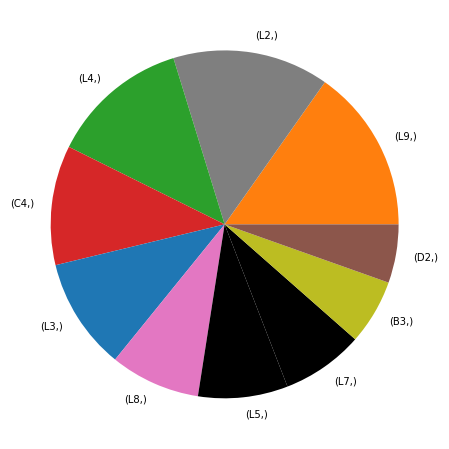

In [14]:
plot = df2.plot.pie(y='ICD-10 Code', figsize=(8, 8), colors = ["tab:orange", "tab:grey", "tab:green", "tab:red", "tab:blue", "tab:pink", "black", "black", "tab:olive", "tab:brown"])

In [15]:
names = ["Index", "Krankheit", "ICD-10", "Confidence measure"]
data = pd.read_csv('KAP_update/final_result_whole.csv', sep="|", skip_blank_lines=True, names = names)
data = data.dropna()
df = data["ICD-10"]
df = df.values.tolist()
for element in df:
    print(element)
    element = element.split(",", 1)
a = [element.split(",", 1) for element in df]
codes = []
for element in a:
    codes.append(element[0][0])
a = pd.DataFrame(codes)
df2 = a.value_counts()

L51.-, Erythema exsudativum multiforme
L97, Ulcus cruris, anderenorts nicht klassifiziert
L28.0, Lichen
C44.9, Basaliom
C44.5, Rumpfhautbasaliom
L44.1, Lichen nitidus
L20.8, Neurodermitis
L30.9, Dermatitis
L81.8, Tätowierung
B02.9, Zoster
L70.1, Acne conglobata
L97, Ulcus cruris, anderenorts nicht klassifiziert
L25.9, Kontaktekzem
L28.0, Lichen
B02.9, Zoster
I77.6, Vasculitis
C92.00, AML1/ETO
C92.00, AML1/ETO
A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex
M35.0,  Sicca-Symptomatik 
L23.9, Allergisches Kontaktekzem
O43.21, Placenta increta als Entbindungskomplikation ohne Blutung
C43.9, Melanom
L30.1, Dyshidrosiformes Hand- und Fußekzem
B35.9, Tinea
D22.9, Tierfellnävus
B35.9, Mikrosporie
D04.1, Morbus Bowen des Lids
L20.8, Neurodermitis
A63.0, Condylomata
L73.9, Folliculitis
Q51.8, Kongenitale Verlagerung von Plattenepithel in den Zervikalkanal
L28.0, Lichen
A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex
L81.8, Tätowierung
A63.0

L88, Pyoderma gangraenosum
L71.8, Rosacea erythematosa
D22.9, Naevus
B00.9, Herpes
D48.9, Tumor
D16.42, Gutartige Neubildung des Nasenknochens
I83.1, Varikophlebitis
I83.1, Varikophlebitis
J34.2, Erworbene nasale Septumdeflexion
L30.1,  Dyshidrose 
L71.1, Rhinophym
I83.1, Stauungsdermatose
L50.9, Urticaria
L30.4, Intertrigo
A50.0, Konnatales Syphilid
L71.8, Rosacea erythematosa
L40.-, Psoriasis
I87.9, Venöser Symptomenkomplex
L30.9, Eczema
C43.9, Melanom
C44.3, Basaliom des medialen Jochbogens
???,  nicht zu klären
B35.4, Tinea corporis
B35.4, Tinea corporis
Z51.9, Therapie
Z51.9, Therapie
L71.9, Rosacea
???,  nicht zu klären
L25.9, Kontaktekzem
B35.3, Fußmykose
L97, Ulcus cruris, anderenorts nicht klassifiziert
I65.8, Verschluss der Arteria auditiva interna
D23.9, Chondroides Syringom
B35.9, Interdigitalmykose
L43.2, Lichenoide Arzneimittelexantheme
L71.8, Rosacea erythematosa
N62, Gynäkomastie
L30.9, Akute Dermatitis
L30.9, Dermatitis
L70.-, Akne
T30.0, Verbrennung
L71.8, Rosacea ery

B07, Verrucae
A56.0, Urethritis durch Chlamydien
D18.0-, Hämangiom
L93.-, Lupus erythematodes
I67.88+, Weber-Syndrom
L30.9, Hautekzem
L30.1, Dyshidrosiformes Handekzem
L85.8, Familiäres Keratoakanthom
L25.9, Kontaktekzem
C18.9, Malignes Melanom des Dickdarms
B02.9, Zoster
N48.1, Balanoposthitis
D22.9, Naevus
C18.9, Malignes Melanom des Dickdarms
L10.0, Pemphigus vulgaris
L30.9, Handekzem
L30.9, Ekzema
A26.0, Erythema migrans
M34.8, Sklerödem beim Erwachsenen
D22.9, Dysplastischer Nävus
T78.1, Milchallergie
L70.1, Acne conglobata
R59.1, Lymphadenopathie
L30.8, Halo-Dermatitis um Naevuszellnaevi
L90.0, Lichen sclerosus et atrophicus
I89.09, Lymphödem
L28.2, Prurigo
T78.1, Milchallergie
L23.9, Kontaktallergie
L90.0, Lichen sclerosus et atrophicus
L28.0, Lichen
M35.2, Mund- und Genital-Ulcera mit Chondritis
L23.9, Kontaktallergie
L93.-, Lupus erythematodes
M34.9, Sklerodermie
H13.3*, Okuläres Pemphigoid
D22.9, Naevus
C44.9, Basaliom
L25.9, Kontaktdermatitis
D22.-, nevus bleu
A54.0, Gonorrh

L71.8, Rosacea erythematosa
B35.9, Trichophytie
A67.9, Pinta
A67.9, Pinta
L25.9, Kontaktekzem
L27.0, Arzneimittelexanthem
L60.0, Unguis incarnatus
L40.-, Psoriasis
L97, Ulcus cruris, anderenorts nicht klassifiziert
L98.1,  Artefakte 
L25.9, Kontaktekzem
A46, Erysipel Wundrose
K13.2, Leukoplakie und sonstige Affektionen des Mundhöhlenepithels, einschließlich Zunge
L25.9, Kontaktekzem
L40.-, Psoriasis
L81.8, Depigmentierungen
C46.-, Kaposi-Sarkom Sarcoma idiopathicum multiplex haemorrhagicum
L30.9, Ekzem
K13.2,  Leukoplakie 
K64.4, Marisken
C44.9, Basaliom
L98.5, Myxodermien
L40.-, Psoriasis
D22.-, Naevuszellnaevus
T30.0, Verbrennung
A09.9, Akute Enterogastritis
C18.9, Malignes Melanom des Dickdarms
I89.09, Lymphödem
C44.9, Basaliom
A46, Erysipel
E30.0, Verzögerte Pubertät Pubertas tarda
A26.0, Erythema migrans
C46.-, Kaposi-Sarkom Sarcoma idiopathicum multiplex haemorrhagicum
L60.0, Unguis incarnatus
C43.9, Malignes Melanom
C44.9, Basaliom
M20.0,  Fingerkontraktur 
L57.0, Aktinische Ker

Q10.4, Agenesie des Punctum lacrimale
L57.3, Erythromelanosis interfollicularis colli
C79.9, Filiae
B01.9, Varizellen
C11.9, NPC
L43.1, Lichen ruber bullosus
L97, Ulcus cruris
K08.2, Unterkieferalveolarfortsatzatrophie
I89.09, Lymphödem
C46.-, Kaposi-Sarkom Sarcoma idiopathicum multiplex haemorrhagicum
L97, Ulcus cruris
Q82.2, Mastozytose
L30.9, Analekzem
L73.8, Talgdrüsenhyperplasie
E61.1,  Sideropenia 
C79.88, Metastase am Bindegewebe der Fossa ischiorectalis
L40.-, Psoriasis
L30.9, Dermatitis
L53.3, Sonstiges figuriertes chronisches Erythem
D18.0-, Hämangiom
L53.9, Erythema
I83.9, Besenreiser
D22.9, Naevus
D22.9, Naevus
D22.9, Naevus
L81.8, Tattoo
L40.0, Psoriasis vulgaris
E85.-, Amyloidose
C44.9, Basaliom
B07, Verrucae
D47.2, TEMPI Teleangiektasien, erhöhte Erythropoetinkonzentration, monoklonale Gammopathie, perinephritischer Abszess, intrapulmonaler Shunt-Syndrom
Q82.2, Mastozytose
L30.9, Akute Dermatitis
L44.2, Lichen striatus
B36.9, Oberflächliche Mykose, nicht näher bezeichnet

D81.4, Hypo-?-Globulinämie
C80.9, Karzinom
L50.6, Kontakturtikaria
D48.5, Atypischer Naevuszellnaevus
T69.1, Frostbeulen
L70.9, Acne
L43.-, Lichen ruber planus
L51.9, Erythema multiforme
L88, Pyoderma gangraenosum
L98.3, Eosinophile Zellulitis Wells-Syndrom
B86, Scabies
R47.8, Bulbäre Sprache
L20.8, Neurodermitis
B35.3, Fußmykose
L40.-, Psoriasis
D17.9,  Spindelzelllipom 
B35.1, Onychomykose
L98.4, Ulcus
L23.9, Allergisches Kontaktekzem
L20.8, Neurodermitis
D22.-, Naevuszellnaevus
K10.20, Maxillärer Abszess
L51.9, Erythema multiforme
R60.0, Gesichtsödem
A46, Erysipel
A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex
L71.-, Rosazea
L30.1, Dyshidrosis Pompholyx
D07.4, Erythroplasie
I51.9, Kardiale Dekompensation
L71.1, Rhinophym
O26.4, PUPP
L40.-, Psoriasis
C44.3, Basaliom des medialen Jochbogens
L70.1, Acne conglobata
E83.1, Hämosiderose
B58.8,  Lymph node toxoplasmosis 
B02.-, Zoster Herpes zoster
D31.5, Benigner Tränenwegtumor
L25.9, Kontaktekzem
O34.30, Betr

I34.9, Nichtrheumatische Mitralklappenkrankheit, nicht näher bezeichnet
L81.4, Lentigo
L25.9, Kontaktekzem
L56.4, Polymorphe Lichtdermatose
C11.9, NPC
U69.10!, Anderenorts klassifizierte Krankheit, für die der Verdacht besteht, dass sie Folge einer medizinisch nicht indizierten ästhetischen Operation, einer Tätowierung oder eines Piercings ist
L56.4, PLD
L90.5, Narben
A06.3, Amöbom
L71.9, Rosacea
L56.4, Polymorphe Lichtdermatose
L98.3, Wells-Syndrom
C44.9, Basaliom
D23.-, Multiple familiäre Trichoepitheliome
L71.8, Rosacea erythematosa
C44.3, Basaliom des medialen Jochbogens
B35.1, Onychomykose
R78.1, Nachweis von Opiaten im Blut
L25.9, Kontaktekzem
M34.9, Sklerodermie
M32.9,  Sle 
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
L40.-, Psoriasis
L40.-, Psoriasis
C44.9, Basaliom
L81.7, Pigment purpura
M34.9, Sklerodermie
D22.9, Naevus
L56.4, PLD
C44.3, Basaliom des medialen Jochbogens
L40.-, Psoriasis
D81.4, Hypo-?-Globulinämie
D81.4, Hypo-?-Globulinämie
B35.0, Tinea capitis
D2

C43.9, Bösartiges akrolentiginöses Melanom
C80.9, Spinaliom
L25.9, Kontaktekzem
L97, Ulcus cruris, anderenorts nicht klassifiziert
C44.9, Basaliom
L98.2, Akute febrile neutrophile Dermatose Sweet-Syndrom
C44.9, Basaliom
L97, Ulcus cruris, anderenorts nicht klassifiziert
L57.0, AK
L50.9, Urticaria
L97, Ulcus cruris, anderenorts nicht klassifiziert
Z51.9, Therapie
A26.0, Erythema migrans
L40.-, Psoriasis
L81.5,  Hypomelanosis guttata 
L85.8, Darier M. isolierter
L72.0, Schleimhautzyste
Z76.3, Gesunde Begleitperson eines Kranken
L93.-, Lupus erythematodes
D02.0, Supraglottisches Carcinoma in situ
L87.1, Perforierende Kollagenose
Q84.8, Aplasia cutis congenita
O26.4, Herpes gestationis
L91.0, Keloid
T66, Unerwünschte Reaktion auf Radiatio a.n.k.
Q51.8, Kongenitale Verlagerung von Plattenepithel in den Zervikalkanal
L57.0, Keratosis
L30.1, Dyshidrosiformes Fußekzem
L63.-, Alopecia areata
L90.0, Lichen sclerosus et atrophicus
D22.9, Naevus
L70.-, Akne
L90.8, Altershaut
H02.6, Xanthelasma
C44

E80.1, Porphyria cutanea tarda
L30.0, Nummuläres Ekzem
L24.9, Hand- und Fußekzem
L95.0, Atrophie blanche
L27.0, Akute generalisierte exanthematische Pustulose
I80.81, Arm vein congestion
L93.-, Lupus
L83, Akanthosis nigricans
L44.1, Lichen nitidus
L01.-, Impetigo
A92.5, Zika o.n.A.
K83.1, Cholestase a.n.k.
L28.0, Lichen
M20.0,  Fingerkontraktur 
L55.-, Dermatitis solaris acuta
B00.1, Herpes labialis
L40.-, Psoriasis
B35.0, Tinea capitis
B35.0, Tinea capitis
L25.9, Kontaktekzem
Q84.0,  Atrichie 
B06.0+, Meningitis bei Rubella
C80.9, Spinaliom
A46, Erysipel
L97, Ulcus cruris
L80, Vitiligo
L43.2, Lichenoide Arzneimittelexantheme
L30.1, Dyshidrosiformes Handekzem
L83, Gougerot-Carteaud-Syndrom
D44.8, MEA Typ I
L85.8, Familiäres Keratoakanthom
L81.1, Chloasma virginum periorale
L40.-, Psoriasis
L40.-, Psoriasis
G58.8,  Notalgia paraesthetica 
C44.9, Basaliom
L57.1, Persistierende Lichtreaktion
M35.6, Lipogranulomatosis generalized
L30.8, Acrodermatitis
F03, Persistierende Demenz
B07, Verruc

L57.0, Aktinische Keratosen
L28.0, Lichen
L80, Vitiligo
L81.4, PUVA-Lentigines
C44.5, Rumpfhautbasaliom
L63.-, Alopecia areata
F03, Demenz
L30.9, Ekzem
R14, Saures Aufstoßen
C44.9, Basalioma terebrans
Q26.6, Fistel zwischen V. portae und A. hepatica (angeboren)
L30.9, Ekzem
L28.0, Lichen
L81.3, Cafe-au-lait-Flecken
D22.9, Nävus
Q31.8, Kongenitale Epiglottisfissur
D05.1, Intraduktales Adenokarzinom
B36.8, Pityrosporum-Follikulitis
L25.9, Kontaktekzem
L30.9, Ekzem
Q80.8, Akrales Peeling-Skin-Syndrom
L50.6, Kontakturtikaria
O44.01, Placenta praevia ohne Blutung
L50.-, Urtikaria
D17.3, Lipom der Haut a.n.k.
Q40.2, Kongenitale gastrokolische Fistel
B35.4, Tinea corporis
L92.0, Granuloma anulare
L57.0, Keratoma
L40.-, Psoriasis
L40.-, Psoriasis
L63.-, Alopecia areata
Q82.2, SSM
B07, Verruca
L60.4,  Beau-reilsche cross furrows of the nails 
L63.-, Alopecia areata
C84.4, Peripheres T-Zell-Lymphom, nicht spezifiziert
L92.9, Granuloma
A66.1, Multiple Papillome und Krabbenframbösie
L40.-, Psorias

D18.00, Angiom
A46, Erysipel Wundrose
L98.8, Kutanes Pseudolymphom
T14.05, Hämatom
L63.-, Alopecia areata
H16.-, Keratitis
L50.9, Urticaria
L20.9, Atopisches Ekzem
T69.1, Perniones
L50.9, Urticaria
L63.-, Alopecia areata
L21.-, Seborrhoisches Ekzem
L20.9, Atopisches Ekzem
L44.1, Lichen nitidus
Z26.9, Impfung
L94.0, Zirkumskripte Sklerodermie
O46.9, Akzidentelle Hämorrhagie vor der Entbindung
R21, Exanthem
L90.0, Lichen sclerosus et atrophicus
L90.0, Lichen sclerosus et atrophicus
L98.0, Granuloma pediculatum Granuloma pyogenicum
L50.9, Urticaria
L21.-, Seborrhoisches Ekzem
C83.5, lymphoblastic leukemia
L81.3, Cafe-au lait-Fleck
L90.0, Lichen sclerosus et atrophicus
L60.5, Yellow-nail-Syndrom Syndrom der gelben Nägel
D76.3, H-Syndrom
L71.8, Rosacea erythematosa
L71.8, Rosacea erythematosa
L87.1, Reaktive perforierende Kollagenose
L90.0, LSA
B35.1, Onychomykose
B02.-, Zoster Herpes zoster
L71.8, Rosacea erythematosa
L28.0, Lichen
L98.8, Fleisch wildes
L20.8, Neurodermitis
L71.0, Perioral

B35.0, Tinea faciei
L73.9, Folliculitis
L98.4, Ulzera
M35.9, Kollagenose
L98.4, Ulcus
C85.9, Lymphom
B09, Virusexanthem
A46, Gesichtserysipel
L44.4, Gianotti-Crosti-Syndrom
L20.9, Atopisches Ekzem
B35.0, Tinea capitis
L25.9, Kontaktekzem
A60.0, Herpes genitalis
C80.9, Undifferenziertes Teratom
L84, Clavus
F48.9, Psychoneurotische Störung
Q85.8, Angeborener panfollikulärer Naevus
L92.0, Granuloma anulare
R09.1, Pleuritis sicca
L65.8, Hypotrichose durch ein zytotoxisches Arzneimittel
Q33.1, Nebenlunge
B55.-, Leishmaniose
D72.1, Hypereosinophilie
L30.9, Eczema
L40.-, Psoriasis
L20.9, Atopisches Ekzem
A46, Erysipel
L50.-, Urtikaria
T69.1, Frost-nip
D72.1, Hypereosinophilie
L25.9, Kontaktekzem
N81.5, Douglashernie
L73.2, Hidradenitis suppurativa
Q84.8, Aplasia cutis congenita
L50.-, Urtikaria
D72.1, Hypereosinophilie
L52, Erythema nodosum
R21, Exanthem
D22.9, Naevus
L30.9, Dermatitis
L30.9, Eczema
D72.1, Hypereosinophilie
D22.9, Naevus
L12.9, Pemphigoid
C44.9, Basaliom
L20.8,  Lippenleckekz

D22.9, Naevus
L90.8,  Atrophodermie 
L10.0, Pemphigus vulgaris
D48.9, Tumor
D22.9, Epidermaler Nävus
L25.9, Kontaktekzem
I40.0, Virale Myokarditis a.n.k.
L90.4,  Acrodermatitis chronica atrophicans 
B35.0, Tinea faciei
D51.0, Kongenitaler Intrinsic-Faktor-Mangel
L85.8, Darier M. isolierter
D18.-, Hämangiom und Lymphangiom
A55, Lymphogranuloma inguinale
E75.2, Morbus Gaucher
L57.0, Aktinische Keratosen
T78.4, Allergie
Q85.1, Tuberöse Sklerose
L30.9, Ekzem
B35.0, Tinea barbae und Tinea capitis
L97, Ulcus cruris
B35.9, Tinea
L83, Acanthosis nigricans
R21, Exanthem
A46, Erysipel
D69.0, Vasculitis allergica
C80.9, Spinaliom
L30.9, Ekzem
T78.4, Allergie
B82.0, Nematodiasis
B82.0, Nematodiasis
A52.3, Gehirnlues
L30.9, Ekzem
D03.9, Lentigo maligna
L01.-, Impetigo
R23.8, Blase
L81.8,  Schmucktätowierung 
L30.9, Ekzem
M72.1, Ankle pads real
L13.0, Dermatitis herpetiformis Duhring
L98.4, Ulkus
C44.9, Basaliom
T78.4, Allergie
D03.9, Lentigo maligna
B68.0, Befall durch Taenia solium
A52.3, Gehirnlu

G90.00, Carotid sinus syncope
L50.9, Urticaria
L72.1, Trichilemmalzyste
C44.5, Rumpfhautbasaliom
B36.1, tinea nigra
B35.4, Tinea corporis
B00.9, Herpes
T88.7, Penicillin-Allergie
L30.9, Dermatitis
L81.8,  Hyperpigmentierung endokrine 
C44.-, BCC
L90.6, Schwangerschaftsstreifen
E75.5,  Hand line xanthomas 
L27.0, Kutane UAW
B02.9, Zoster
L20.9, Atopisches Ekzem
K14.3, Lingua villosa
D48.5, Dysplastic nevus
D03.9, Lentigo maligna
L93.-, LE
L20.9, Atopisches Ekzem
L50.-, Urtikaria
L27.0, Kutane UAW
L20.-, Atopisches endogenes Ekzem
Q82.2, SSM
L90.3, Morphea plana atrophicans
C44.9, Basaliom
D48.5, Dysplastic nevus
B08.1, Mollusca contagiosa
G90.00, Carotid sinus syncope
A51.0, Lues I
M33.1, Dermatomyositis
L70.4, Acne infantum
L20.-, Atopisches endogenes Ekzem
L50.9, Urticaria
L50.9, Urticaria
L30.9, Handekzem
Q82.2, SSM
L20.9, Atopisches Ekzem
C44.-, BCC
M14.49*, Arthropathie bei Amyloidose: Nicht näher bezeichnete Lokalisation
L27.2,  Fischallergie 
L94.1, Lineare oder bandförmige Skler

D18.00, Angiom
L56.4, Polymorphe Lichtdermatose
I99,  Vaskulopathie 
M72.2, Ledderhose M.
A52.1+, Syphilitisches Malum perforans pedis
L30.9, Dermatitis
L68.-, Hypertrichose
L30.9, Ekzem
L90.0, Lichen sclerosus et atrophicus
L98.8, Borrelien-Lymphozytom
D13.9, Darmadenom
L30.9, Dermatitis
D22.9, Dysplastischer Nävus
L27.0, Arzneimittelexanthem
K29.7,  Corpus gastritis 
L81.8, Hyperpigmentierung
Q26.6, Fistel zwischen V. portae und A. hepatica (angeboren)
L12.9, Pemphigoid
L93.0, CDLE
L81.4, Schleimhautmelanose
A31.1, Schwimmbadgranulom
F95.8, Augenlid-Tic
L53.9, Erythema
L30.9, Ekzem
Q82.2, SSM
L51.0, EEM
R23.8, Gänsehaut
L30.9, Ekzem
J34.0, Abszess, Furunkel und Karbunkel der Nase
T30.4, Verätzung
L12.0, Bullöses Pemphigoid
M72.0, Morbus Dupuytren
L30.9, Ekzem
H27.9, Affektion der Linse, nicht näher bezeichnet
B07, Verrucae
L93.0, CDLE
C44.-, BCC
B02.-, Zoster Herpes zoster
C44.3, Basaliom des medialen Jochbogens
Q82.8, Keratodermia
L53.9, Erythema
M72.0, Fibromatose der Palmarfaszie 

D22.-, Kongenitaler Naevuszellnaevus
C44.-, Basalzell-Karzinom
L23.-, Allergische Kontaktdermatitis
T78.3, AE
K11.2, Eitrige Adenitis der Parotis
L71.8, Rosacea erythematosa
K13.4, Granuloma teleangiectaticum der Mundschleimhaut
C44.-, BCC
D22.9, Nävi
B35.1, Onychomykose
D86.-, Sarkoidose
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
L56.8, Persistierende Lichtreaktion der Haut
L42, Pityriasis rosea
L41.-, Parapsoriasis
C46.9, Kaposi-Sarkom
M79.39, Pannikulitis
L30.9, Ekzem
L30.9, Ekzem
B35.4, Tinea corporis
L88, Pyoderma gangraenosum
D18.-, Hämangiom und Lymphangiom
A46, Erysipel
Q82.2, Mastozytose (angeboren)
A52.3, Syphilis des ZNS
L30.9, Ekzem
A52.3, Gehirnlues
M79.39, Pannikulitis
B35.1, Onychomykose
B35.9, Tinea
T78.3, AE
G62.9, Neuropathie
A26.0, Erythema migrans
L40.-, Psoriasis
T78.3, AE
L30.9, Ekzem
L66.2, Folliculitis decalvans
D59.5,  Syndrome 
K66.8, Pseudoperitonealzyste
M72.0, Morbus Dupuytren
L52, Erythema nodosum
L92.0, Granuloma anulare
D18.0-, Hämangiom
D2

L63.2, Ophiasis
M72.-, generalisierte
L40.-, Psoriasis
L01.-, Impetigo
B02.9, Zoster
L70.1, Acne conglobata
L41.-, Parapsoriasis
L53.1, Erythema anulare centrifugum
A26.0, Erythema migrans
L80, Vitiligo
L30.9, Ekzem
M34.9, Sklerodermie
L28.0, Lichen
L21.0, Pityriasis
L71.8, Morbihans disease
L40.-, Psoriasis
L63.8, Alopezia areata
L71.8, Rosacea papulosa
C79.9, Metastase
L28.0, Lichen
L53.1, Erythema anulare centrifugum
C46.9, Kaposi-Sarkom
L41.-, Parapsoriasis
L88, Pyoderma gangraenosum
L71.-, Rosazea
B35.9, Tinea
L57.0, Keratosis
I83.0,  Gamaschenulkus 
L63.8, Alopezia areata
T75.3, Autokrankheit
D51.0, Kongenitaler Intrinsic-Faktor-Mangel
L02.9, Furunkulose
L30.9, Dermatitis
B88.0, Demodikose
M72.0, Morbus Dupuytren
C44.9, Basaliom
M72.0, Morbus Dupuytren
B35.9, Tinea
L73.9, Follikulitis
L93.-, Lupus erythematodes
T30.0, Verbrennung
B35.1, Onychomykose
C84.0, MF
M72.0, Morbus Dupuytren
L80, Vitiligo
D21.9, Fibrom der Sehnenscheide
L80, Vitiligo
R21, Exanthem
L71.-, Rosazea
T78.4, Al

L30.9, Ekzem
L40.-, Psoriasis
L10.0, Pemphigus vulgaris
L97, Ulcus cruris, anderenorts nicht klassifiziert
L27.0, Arzneimittelexanthem
L90.5, Narbe
L41.0, PLEVA
I77.6, Vasculitis
L90.3, Morphea plana atrophicans
L70.-, Akne
L10.0, Pemphigus vulgaris
D04.7, Carcinoma in situ der Haut einer Zehe a.n.k.
L11.1, benign papular acantholytic dermatosis
G90.00, Carotid sinus syncope
L40.-, Psoriasis
L98.8, Pseudolymphom
L20.9, Atopisches Ekzem
L28.2, Prurigo
O99.0,  Anemia in pregnancy 
S82.88, Malleolusfraktur
C82.-, Follikuläres Lymphom
L02.9, Abszess
L94.3, Sklerodaktylie
L30.0, Nummuläres Ekzem
L40.-, Psoriasis
L98.4, Ulcus
L20.9, Atopisches Ekzem
K11.5, Sialolithiasis
L28.0, Lichen
D00.0, Carcinoma in situ des Rachenrings a.n.k.
L51.1, SJS
D22.9, Naevus
L94.0, Morphea
L20.9, Atopisches Ekzem
B35.4, Tinea corporis
D48.9, Tumor
L20.9, Atopisches Ekzem
L98.2, Akute febrile neutrophile Dermatose Sweet-Syndrom
L40.-, Psoriasis
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
M72.0, Fib

L40.-, Psoriasis
L81.8, Tattoo
E70.3, Albinismus
B35.4, Tinea corporis
L98.4, Ulcus
R23.1, Livedo
D18.0-, Hämangiom
L30.9, Ekzem
I83.0, Varizen mit Ulcus cruris
L10.0, Pemphigus vulgaris
L81.8, Tattoo
C44.9, Basaliom
I87.8, Kinking-Vene
L28.0, Follicular keratosis of the chin
L30.0, Nummuläres Ekzem
A52.3, Gehirnlues
L92.0, Granuloma anulare
C44.-, BCC
Z51.9, Therapie
C43.9, Melanom
I87.0-, PTS
L40.-, Psoriasis
C43.9, Melanom
I83.1, Stauungsdermatitis
F63.3, Trichotillomanie
C44.-, BCC
L30.9, Ekzem
L93.-, LE
L93.1,  Scle 
L42, Pityriasis rosea
L30.0, Nummuläres Ekzem
K13.0, Cheilitis
L40.-, Psoriasis
L40.-, Psoriasis
L40.-, Psoriasis
L30.2, Id-Reaktion
L30.0, Nummuläres Ekzem
L85.8, Keratoakanthom
L71.0, Periorale Dermatitis
L91.0, Keloid
L73.9, Folliculitis
L88, Pyoderma gangränosum
C80.9, Bösartige Neubildung unklarer Genese
L89.94, Druckulkus am Os sacrum
T78.3, AE
T78.3, AE
D69.3,  ITP 
L30.0, Nummuläres Ekzem
Q54.8, Sonstige Formen der Hypospadie
L30.0, Nummuläres Ekzem
L30.0, Num

C84.0, MF
L90.3, Morphea plana atrophicans
L30.8, Exsikkationsekzem
L65.9, Alopezie
L08.1, Erythrasma intertriginosum
D18.-, Hämangiom und Lymphangiom
B35.1, Onychomykose
L30.9, Ekzem
Q14.8, Kongenitaler Konus
Q80.-, Ichthyosis congenita
D22.9, Naevus
L94.0, Zirkumskripte Sklerodermie
L30.9, Ekzem
D22.9, Naevus
L42, Pityriasis rosea
L80, Vitiligo
L40.-, Psoriasis
C84.5, Primär kutanes aggressives epidermotropes CD8-positives T-Zell-Lymphom
T78.4, Allergie
L40.-, Psoriasis
C90.00, Myelom
L30.9, Ekzem
T14.08, Serom
L10.0, Pemphigus vulgaris
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
T56.1, Merkurialismus a.n.k.
L42, Pityriasis rosea
A18.4, Lupus vulgaris
L27.0, AGEP
C44.-, SCC
L40.-, Psoriasis
T78.3, AE
T78.3, AE
L30.9, Dermatitis
L40.-, Psoriasis
L40.1, Generalisierte Psoriasis pustulosa
D64.2, Sekundäre sideroachrestische sideroblastische Anämie durch Arzneimittel oder Toxine
E66.89, Konstitutionelle Fettsucht
L23.-, Allergische Kontaktdermatitis
B35.1, Onychomykose
L40.-

C84.0, MF
L50.-, Urtikaria
L30.9, Ekzem
L30.9, Ekzem
A57, Ulcus molle (venereum)
C44.-, BCC
C84.1, Sezary-Syndrom
I83.1, Stauungsdermatitis
L94.1, Lineare oder bandförmige Sklerodermie
L92.1, Necrobiosis lipoidica
L63.-, Alopecia areata
C84.0, MF
L51.0,  EMPACT 
E14.60+, Necrobiosis lipoidica diabeticorum
I73.9, AVK
L30.0, Nummuläres Ekzem
L30.9, Ekzem
Q87.8, KID-Syndrom
L40.-, Psoriasis
I83.0, Ulcus varicosum des Beins
L30.0, Nummuläres Ekzem
L94.0, Morphea
L80, Vitiligo
L97, Ulcus cruris
E75.2, colors disease
B35.1, Onychomykose
A46, Erysipel
B35.9, Tinea
D47.0, Indolente systemische Mastozytose
Q82.2, Diffuse kutane Mastozytose
D04.9, M. Bowen
Q82.2, Mastozytose (angeboren)
L98.4, Ulcus
L10.0, Pemphigus vulgaris
L41.-, Parapsoriasis
L40.-, Psoriasis
L44.1, Lichen nitidus
B07, Verruca
A46, Erysipel
C44.-, SCC
L30.0, Nummuläres Ekzem
L40.-, Psoriasis
M33.2, Polymyositis
B35.1, Onychomykose
K65.-, SBP
L30.0, Nummuläres Ekzem
L53.9, Erythema
L40.-, Psoriasis
M34.9, Sklerodermie
L28.1, P

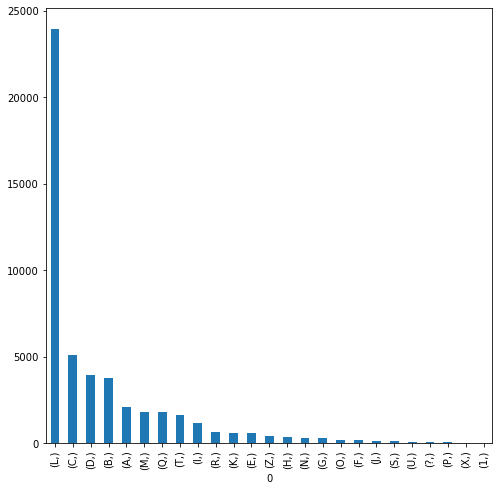

In [16]:
plot = df2.plot.bar(y='ICD-10 Code', figsize=(8, 8))

In [17]:
names = ["Index", "Diagnosis", "ICD-10", "Confidence Score"]
cla = pd.read_csv('KAP_update/final_result.csv', sep="|", skip_blank_lines=True, encoding = "ISO-8859-1", names = names)

In [18]:
cla

Index                                        Diagnosis  \
0      1106                  Erythema exsudativum multiforme   
1      1107                                     Ulcus cruris   
2      1108                                              NaN   
3      1109  präputiale synedien? bei lichen ruber annularis   
4      1110                                 Basaliom nach OP   
...     ...                                              ...   
1015   2223           Zoster (m. Befall d. Segmentes C3, C4)   
1016   2224                        Paraneoblanisches Syndrom   
1017   2225                     Perianales Ekzem + Rhaganden   
1018   2226                       Psorriasis vulgaris Naevus   
1019   2227                           Ulcustroph. nach Laser   

                                                 ICD-10  Confidence Score  
0          ['L51.-', 'Erythema exsudativum multiforme']        100.000000  
1     ['L97', 'Ulcus cruris, anderenorts nicht klass...        100.000000  
2     ['C84.6," Anaplastisches großzelliges Lymphom ...        100.000000  
3                                   ['L28.0', 'Lichen']        100.000000  
4                                 ['C44.9', 'Basaliom']        100.000000  
...                                                 ...               ...  
1015                                ['B02.9', 'Zoster']        100.000000  
1016            ['C80.9', 'Paraneoplastisches Syndrom']         90.000000  
1017                                 ['L30.9', 'Ekzem']        100.000000  
1018                                ['D22.9', 'Naevus']        100.000000  
1019             ['L43.8', 'Lichen planus atrophicans']         80.851064  

[1020 rows x 4 columns]

In [19]:
len(cla.where(cla["Confidence Score"] > 90).dropna()) / len(cla)

0.865686274509804

In [22]:
#Show most common distributed codes
names = ["Index", "Krankheit", "ICD-10", "Confidence measure"]
data = pd.read_csv('KAP_update/final_result_whole.csv', sep="|", skip_blank_lines=True, names = names)
data = data.dropna()
df = data["ICD-10"]
df = df.values.tolist()
for element in df:
    print(element)
    element = element.split(",", 1)
a = [element.split(",", 1) for element in df]
codes = []
for element in a:
    codes.append(element[0])
a = pd.DataFrame(codes)
df2 = a.value_counts()[1:20]

L51.-, Erythema exsudativum multiforme
L97, Ulcus cruris, anderenorts nicht klassifiziert
L28.0, Lichen
C44.9, Basaliom
C44.5, Rumpfhautbasaliom
L44.1, Lichen nitidus
L20.8, Neurodermitis
L30.9, Dermatitis
L81.8, Tätowierung
B02.9, Zoster
L70.1, Acne conglobata
L97, Ulcus cruris, anderenorts nicht klassifiziert
L25.9, Kontaktekzem
L28.0, Lichen
B02.9, Zoster
I77.6, Vasculitis
C92.00, AML1/ETO
C92.00, AML1/ETO
A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex
M35.0,  Sicca-Symptomatik 
L23.9, Allergisches Kontaktekzem
O43.21, Placenta increta als Entbindungskomplikation ohne Blutung
C43.9, Melanom
L30.1, Dyshidrosiformes Hand- und Fußekzem
B35.9, Tinea
D22.9, Tierfellnävus
B35.9, Mikrosporie
D04.1, Morbus Bowen des Lids
L20.8, Neurodermitis
A63.0, Condylomata
L73.9, Folliculitis
Q51.8, Kongenitale Verlagerung von Plattenepithel in den Zervikalkanal
L28.0, Lichen
A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex
L81.8, Tätowierung
A63.0

L87.1, Reaktive perforierende Kollagenose
I83.9, Stammvarikose
L28.0, Lichen
C44.9, Basaliom
L30.2, Ekzematid
A60.-, Infektionen des Anogenitalbereiches durch Herpesviren Herpes simplex
B00.1, Herpes labialis
E10.50, Diabetische Gangrän bei Typ-1-Diabetes mellitus
???,  ungeklärt
D18.01, Infantile Hämangiome
D22.9, Naevus
D76.3, H-Syndrom
B35.4, Tinea corporis
B35.4, Tinea corporis
B35.4, Tinea corporis
Z94.-, Zustand nach Organ- oder Gewebetransplantation
L20.8, Neurodermitis
L70.9, Acne
L21.-, Seborrhoisches Ekzem
L70.1, Acne conglobata
K13.2,  Leukoplakie 
L97, Ulcus cruris, anderenorts nicht klassifiziert
U69.10!, Anderenorts klassifizierte Krankheit, für die der Verdacht besteht, dass sie Folge einer medizinisch nicht indizierten ästhetischen Operation, einer Tätowierung oder eines Piercings ist
I89.09, Elephantiasis teleangiectodes
A51.0, Genitale Lues
B07, Verrucae
B35.-, Dermatophytose Tinea
T30.4, Verätzung
A38, Scharlach
B35.4, Tinea corporis
K14.1, Lingua geographica
B01.-, 

A19.9, Septische Tuberkulose a.n.k.
D22.-, Naevuszellnaevus
L40.-, Psoriasis
B00.9, Herpes
L30.9, Handekzem
L57.1, Aktinisches Retikuloid
L23.9, Kontaktallergie
D22.-, Kongenitaler Naevuszellnaevus
D84.8, 612840
L40.-, Psoriasis
L40.-, Psoriasis
L20.8, Neurodermitis
E01.2, Endemische Struma
L40.-, Psoriasis
L71.8, Rosacea erythematosa
L98.1,  Artefakte 
L30.3, Mikrobielles Ekzem
B35.9, Trichophytie
L70.5, Acne excoriée
L97, Ulcus cruris, anderenorts nicht klassifiziert
L40.-, Psoriasis
I83.9, Varizen
H61.0, Chondrodermatitis nodularis chronica helicis
L28.0, Lichen
L57.1, Aktinisches Retikuloid
L93.-, Lupus erythematodes
K12.1, Stomatitis
L43.-, Lichen ruber planus
B00.9, Herpes
L21.-, Seborrhoisches Ekzem
L85.8, Dyskeratosis
L57.0, Keratoma
L40.-, Psoriasis
I77.6, Vasculitis
N48.1, Balanoposthitis
C44.3, Basaliom des medialen Jochbogens
D23.9, Talgdrüsenepitheliom
A63.0, Condylomata
M30.1,  Granulomatose eosinophile mit Polyangiitis 
C43.9, Malignes noduläres Melanom
I73.0, Morbus Ray

L90.4, Akrodermatitis chronica atrophicans
H40.2, Restzustand eines chronischen Engwinkelglaukoms
D39.9, Unsichere Neubildung des weiblichen Urogenitaltraktes
D22.-, Naevuszellnaevus
L65.9, Alopezie
L81.4, Lentigo
B48.0, Keloid-Blastomykose
L57.0, Aktinische Keratosen
D69.0, Vasculitis allergica
T78.1, Allergie auf Nahrungsmittel
D04.1, Morbus Bowen des Lids
L60.3, Trachyonychia
B35.4, Tinea corporis
B35.4, Tinea corporis
B35.4, Tinea corporis
A22.0, Pustula maligna
D04.1, Morbus Bowen des Lids
L40.-, Psoriasis
L90.4, Akrodermatitis chronica atrophicans
D39.9, Unsichere Neubildung des weiblichen Urogenitaltraktes
L20.8, Neurodermitis
L64.9, Calvities
L20.8, Neurodermitis
D07.6, Carcinoma in situ des Müller-Ganges beim Mann
L20.8, Neurodermitis
D48.5, BK-Mole Syndrome
L81.9,  Hyperpigmentierung universelle 
D07.4, Erythroplasie
L08.8,  Fußinfekt gramnegativer 
A54.0, Gonorrhoische Condylomata acuminata
L28.0, Lichen
L98.8,  Hyperplasie 
I99, Durchblutungsstörung
M34.9, Sklerodermie
L93.

L20.8, Neurodermitis
L43.-, Lichen ruber planus
D22.9, Naevus
B48.0, Keloid-Blastomykose
L10.4, Pemphigus erythematosus
L42, Pityriasis rosea
L60.3, Onychodystrophie
Q87.2, Inverses Klippel-Trenaunay-Syndrom
E30.0, Verzögerte Pubertät Pubertas tarda
M33.-, Dermatomyositis-Polymyositis
L58.-, Radiodermatitis
L70.9, Acne
L30.9, Handekzem
L85.8, Familiäres Keratoakanthom
L20.8, Neurodermitis
L70.0, Acne indurata
L30.2, Ekzematid
R34, eingeschränkte Harnausscheidung
L20.8, Neurodermitis
L20.8, Neurodermitis
L57.0, Keratose
L20.8, Neurodermitis
O34.30, Betreuung der Mutter bei vaginalsonographisch dokumentierter Zervixlänge unter 10 mm oder Trichterbildung
C18.9, Malignes Melanom des Dickdarms
L60.3, Onychodystrophie
L92.9, Granuloma
L24.2, Toxische Dermatitis durch Terpentine
L71.0, Periorale Dermatitis
L30.9, Ekzem
D18.01, Infantile Hämangiome
L21.-, Seborrhoisches Ekzem
D22.9, Naevus
D22.9, Naevus
L40.-, Psoriasis
L70.9, Acne
M34.9, Sklerodermie
C84.0, Mycosis fungoides
C43.9, Melanom
K3

L20.8, Neurodermitis
L08.0, Pyodermie
D17.3, Lipom der Haut a.n.k.
D18.01, Infantile Hämangiome
A63.0, Anogenitale (venerische) Warzen
L81.3, Cafe-au lait-Fleck
D86.-, Sarkoidose
C80.9, Paraneoplastisches Syndrom
C80.9, Paraneoplastisches Syndrom
L25.9, Kontaktekzem
C44.9, Basaliom
L98.8, Lymphozytom
T42.3,  Koma-Blasen 
C44.3, Basaliom des medialen Jochbogens
L81.4, Lentigo
C44.9, Basaliom
B35.1, Onychomycosis
L28.0, Lichen
L51.9, Erythema multiforme
L90.0, Lichen sclerosus et atrophicus
D47.2, TEMPI Teleangiektasien, erhöhte Erythropoetinkonzentration, monoklonale Gammopathie, perinephritischer Abszess, intrapulmonaler Shunt-Syndrom
L70.-, Akne
C44.3, Basaliom des medialen Jochbogens
L57.2, Cutis rhomboidalis nuchae
C44.9, Basaliom
I25.9, CAD
B07, Verrucae
L08.0, Staphylodermie
L40.0, Psoriasis vulgaris
B35.1, Onychomykose
C44.9, Spinaliom der Haut Plattenepithelkarzinom
D22.9, Naevus
L40.-, Psoriasis
L28.0, Lichen
L97, Ulcus cruris
D22.9, Naevus
L08.0, Pyodermie
L30.9, Handekzem
C47

L25.9, Kontaktekzem
E88.29, Lipomatose
L40.-, Psoriasis
L25.9, Kontaktekzem
C48.2, Peritonealsarkomatose
O33.7, Fetopelvines Missverhältnis durch zusammengewachsene Zwillinge
K14.5, Lingua plicata
L81.6, Poikilodermie
Q85.0, Neurofibromatose
L40.-, Psoriasis
C79.2, Hautmetastase
L40.-, Psoriasis
H91.3, Mutismus bei kongenitaler Taubheit a.n.k.
L40.-, Psoriasis
L53.9, Erythrodermie
L20.8, Atopisches Handekzem
L70.-, Akne
L30.8, Acrodermatitis
C44.9, Basaliom
L70.-, Akne
L40.-, Psoriasis
L30.9, Handekzem
D81.4, Hypo-?-Globulinämie
D81.4, Hypo-?-Globulinämie
L60.3, Nageldystrophie
D03.5, Melanoma in situ der Achselhöhle
L72.0, Milien
A60.1, Herpes perianalis
B35.1, Onychomykose
Q15.0, Megalokornea mit Glaukom
L92.9, Granuloma
L71.-, Rosazea
A18.4, Primäres Skrofuloderm
C43.9, Malignes Melanom
A46, Gesichtserysipel
L40.-, Psoriasis
L25.9, Kontaktekzem
B76.9, Larva migrans cutanea
L53.9, Erythrodermie
L40.-, Psoriasis
B35.1, Onychomykose
R10.3, Unklare Unterbauchschmerzen
L40.-, Psoriasis
A

L40.-, Psoriasis
L30.9, Analekzem
C44.9, Basaliom
M94.89, Polychondritis
L98.1,  Artefakte 
A63.0, Condylomata
L30.1, Cheiropompholyx
L50.9, Urticaria
L20.8, Neurodermitis
A38, Scharlach
L42, Pityriasis rosea
L60.1, Onycholyse
A51.2,  Ulcer durum 
L97, Ulcus cruris, anderenorts nicht klassifiziert
I83.9, Varikosis
L43.-, Lichen ruber planus
L20.8, Neurodermitis
D76.3, H-Syndrom
T30.0, Verbrennung
L25.9, Kontaktekzem
L20.8, Neurodermitis
N81.6, Weiblicher anorektaler Prolaps
L40.-, Psoriasis
H02.6, Xanthelasma
L81.8, Hautverfärbung durch Silber
I89.09, Lymphödem
L25.9, Kontaktdermatitis
L30.2, Id-Reaktion
H02.6, Xanthelasmen
Z71, Impfberatung
T02.00, Frakturen mit Beteiligung von Kopf und Hals: geschlossen oder o.n.A.
L97, Ulcus cruris
L40.-, Psoriasis
L28.0, Lichen
L40.-, Psoriasis
L93.-, LE
C43.-, Bösartiges Melanom der Haut
O89.0, Puerperaler Lungenkollaps
R22.9, Subkutaner Knoten
M72.1, Fingerknöchelpolster Knuckle pads
L90.4, Akrodermatitis chronica atrophicans
L91.0, Keloid
F41.1,

L81.6, Poikilodermia
D22.-, Naevuszellnaevus
C00.1, Krebs der äußeren Unterlippe
B08.0,  Vaccine node 
M72.2, Ledderhose M.
L30.8, Acrodermatitis
L53.1, Erythema anulare centrifugum
A26.0, Erythema migrans
L92.0, Granuloma anulare
L92.0, Granuloma anulare
L50.9, Urticaria
A26.0, Erythema migrans
T14.03, Insektenstich
T63.4, Bienenstich
L27.0, Arzneimittelexanthem
K14.3, Lingua villosa
L87.2, Elastosis perforans serpiginosa
G54.0, Strahleninduzierte Plexopathie des Plexus brachialis
K13.0, Cheilitis
A26.0, Erythema migrans
B01.-, Varizellen Windpocken
L91.0, Keloid
D22.9, Naevus
L72.1, Trichilemmalzyste
L30.9, Analekzem
C44.9, Basaliom
C44.9, Basaliom
L50.-, Urtikaria
L63.-, Alopecia areata
R29.8, Druckempfindlichkeit eines Nervenaustrittspunktes
A51.2,  Ulcer durum 
L92.0, Granuloma anulare
L71.9, Rosacea
C44.3, Basaliom des medialen Jochbogens
L40.-, Psoriasis
C80.9, Spinaliom
T63.4, Wespengift
C44.3, Basaliom des medialen Jochbogens
L57.4, Elastoidosis cutanea
C44.3, Basaliom des med

A46, Gesichtserysipel
R23.1, Livedo
A46, Erysipel
L40.-, Psoriasis
C44.9, Basaliom
L41.0, Pityriasis lichenoides et varioliformis acuta Mucha-Habermann
E23.0, Fertile eunuch syndrome
I61.9, Hämorrhagie bei Schlaganfall
L57.0, keratoma senile
B08.0, Ecthyma contagiosum
L64.-, Alopecia androgenetica
A46, Gesichtserysipel
L28.0, Lichen
C44.9, Basaliom
L81.8, Buschke Hitzemelanose
C43.9, Melanom
M43.07, Spondylolyse im Lumbosakralbereich
L71.0, Periorale Dermatitis
L28.2, Prurigo
L30.9, Ekzem
L21.-, Seborrhoisches Ekzem
L80, Vitiligo
L40.-, Psoriasis
L01.-, Impetigo
L23.9, Allergisches Kontaktekzem
K13.2,  Leukoplakie 
L71.0, Periorale Dermatitis
L30.9, Dermatitis
L80, Vitiligo
L90.0, Lichen sclerosus et atrophicus
L41.0, PLEVA
L70.0, Acne vulgaris
L28.2, Prurigo
L02.9, Furunkulose
L30.9, Ekzem
L63.-, Alopecia areata
L40.-, Psoriasis
C43.9, Melanom
L08.0, Pyodermie
C43.9, Melanom
L40.-, Psoriasis
L53.1, Erythema anulare centrifugum
L40.8, Nagelpsoriasis
L93.1,  Scle 
A46, Erysipel
A52.1+, 

B07, Verrucae
L30.9, Handekzem
L30.9, Ekzem
L30.9, Ekzem
L85.8, Familiäres Keratoakanthom
L85.8, Keratoakanthom
L63.-, Alopecia areata
B08.1, Mollusca contagiosa
T78.1,  Milben-Krustazeen-Mollusken-Syndrom 
A63.0, Condylomata
L30.9, Ekzem
L40.-, Psoriasis
L98.0, Granuloma pediculatum Granuloma pyogenicum
C43.9, Malignes Melanom
B35.0, Tinea capitis
C84.0, Mycosis fungoides
L88, Pyoderma gangraenosum
L40.-, Psoriasis
L63.-, Alopecia areata
D81.4, Hypo-?-Globulinämie
A26.0, Erythema migrans
L71.0, Periorale Dermatitis
L30.9, Ekzem
L64.-, Alopecia androgenetica
L30.9, Ekzem
L97, Ulcus cruris
L65.8, Hypotrichie
L63.-, Alopecia areata
D81.4, Hypo-?-Globulinämie
L71.0, Periorale Dermatitis
L66.2, Folliculitis decalvans
Q45.3, Pankreasaberration
B07, Verrucae
L30.9, Ekzem
B07, Verrucae
L93.-, Lupus erythematodes
K13.2,  Leukoplakie 
L64.-, Alopecia androgenetica
L57.2, Aktinische Elastose
B08.1, Mollusca contagiosa
B07, Verrucae
P03.8, Extraktion des Fetus mit Haken
L30.9, Ekzem
L92.2, Granul

L71.8, Rosacea erythematosa
L98.2, Sweet-Syndrom
L63.-, Alopecia areata
L63.-, Alopecia areata
L71.8, Rosacea erythematosa
L63.-, Alopecia areata
M35.4, Eosinophile Fasziitis
K90.8+, Morbus Whipple
L97, Ulcus cruris, anderenorts nicht klassifiziert
L71.8, Rosacea erythematosa
L30.2, Id-Reaktion
I80.3, Beinvenenthrombose
L50.9, Urticaria
L28.1, Prurigo nodularis
L92.0, Granuloma anulare
L30.0, Nummuläres Ekzem
B07, Verrucae
C43.9, Melanom
M01.2-*, Arthritis bei Lyme-Krankheit
D86.3, Lupus pernio
L27.0, AGEP Akute generalisierte exanthematische Pustulose
I78.8, Kapillaritis
I61.9, Nichttraumatische miliare Gehirnblutung
L88, Pyoderma gangraenosum
S06.8, Traumatische intrakranielle Blutung
N83.7, Hämatom des Lig. latum uteri
L92.0, Granuloma anulare
L85.8, Darier M. isolierter
L50.9, Urticaria
Q82.2, Mastozytose
T88.7, Ovulationshemmerunverträglichkeit
L92.0, Granuloma anulare
N48.1, Balanitis
L71.8, Rosacea erythematosa
L80, Vitiligo
L30.9, Handekzem
L71.8, Rosacea erythematosa
L71.8, Ro

T78.4, Allergie
D51.0, Kongenitaler Intrinsic-Faktor-Mangel
B55.-, Leishmaniose
L40.9, Psoriasiformes Bild
L81.8, Hyperpigmentierung
A46, Erysipel Wundrose
C92.00,  Aml 
C80.9, Spinaliom
L98.1,  Artefakte 
L50.9, Urticaria
L88, Pyoderma gangraenosum
E83.58, Calcinosis
D86.-, Sarkoidose
D22.9, Naevus
L92.0, Granuloma anulare
C44.9, Basaliom
R58, Viszerale Hämorrhagie
C44.-, BCC
B83.0, Larva migrans visceralis
M67.4-, Ganglion
T30.0, Verbrühung
D72.1, Hypereosinophilie
L30.0, Nummuläres Ekzem
L44.0, Pityriasis rubra pilaris
L30.9, Dermatitis
B35.4, Tinea corporis
L41.0, PLEVA
B65.9+, Bilharziose der Lunge a.n.k.
D72.1, Hypereosinophilie
L20.-, Atopisches endogenes Ekzem
M13.99, Arthritis
L92.0, Granuloma anulare
A26.0, Erythema migrans
L25.9, Kontaktdermatitis
B37.9, Candidose
L92.-,  Granuloma anulare (Übersicht) 
R21, Exanthem
L40.-, Psoriasis
B35.4, Tinea corporis
M06.99, Rheumatoide Arthritis
C43.9, Melanom
T88.1, Impfreaktion
Z51.9, Therapie
C44.9, Basaliom
L30.8, Acrodermatitis
T30

L50.9, Urticaria
L30.2, Id-Reaktion
L28.0, Lichen
L30.8, Acrodermatitis
L23.-, Wiesengräserdermatitis
L85.8, Keratoakanthom
M20.0,  Fingerkontraktur 
A46, Erysipel
C44.9, Basaliom
M20.0,  Fingerkontraktur 
T88.7, Arzneimittelreaktion
L30.2, Id-Reaktion
L30.2, Id-Reaktion
L81.8, Hyperpigmentierung
L92.9, Granuloma
L81.8, Tattoo
L57.0, Aktinische Keratosen
M20.0,  Fingerkontraktur 
L57.0, Keratom
A51.4, Lues II
Q26.6, Fistel zwischen V. portae und A. hepatica (angeboren)
Q80.-, Ichthyosis congenita
L30.9, Handekzem
L30.0, Nummuläres Ekzem
C80.9, Karzinom
L92.0, Granuloma anulare
C80.9, Spinaliom
I77.6, Vasculitis
C44.3, Basaliom des medialen Jochbogens
C44.3, Basaliom des medialen Jochbogens
B35.0, Tinea barbae und Tinea capitis
A68.1, Borreliose tropisches Rückfallfieber durch Zeckenbiss
L20.-, Atopisches endogenes Ekzem
L28.0, Lichen
D03.3, Melanoma in situ der Wange
L28.0, Lichen
A26.0, Erythema migrans
L50.9, Urticaria
L50.9, Urticaria
B55.9, Leishmaniasis
L30.9, Ekzem
L93.1,  Scle 


Q80.9, Ichthyosis
L50.9, Urticaria
L57.0, Aktinische Keratose
A64, STD
L28.-, Lichen simplex chronicus und Prurigo
L20.8, Atopisches Handekzem
L20.9, Atopisches Ekzem
I70.24, Ulcus cruris mixtum vom Becken-Bein-Typ
D86.-, Sarkoidose
A52.3, Gehirnlues
L28.1, Prurigo nodularis
L12.0, Bullöses Pemphigoid
L20.-, Atopisches endogenes Ekzem
T78.4, Allergie
L40.3, Pustulosis palmoplantaris
C79.82, Metastase an der Penishaut a.n.k.
Q84.8, Aplasia cutis congenita
L20.-, Atopisches endogenes Ekzem
A54.2+, Akute gonorrhoische Endometritis
N48.6, Induratio penis plastica
A23.9, Bruzellosen
L10.0, Pemphigus vulgaris
M72.0, Morbus Dupuytren
D03.9, Lentigo maligna
L41.-, Parapsoriasis
L25.9, Kontaktekzem
M72.2, Morbus Ledderhose
L30.9, Handekzem
A31.1, Schwimmbadgranulom
L92.1, Necrobiosis lipoidica
E80.6, Hyperbilirubinaemia Dubin-Johnson type
L92.0, Granuloma anulare
L41.0, Pityriasis lichenoides et varioliformis acuta Mucha-Habermann
B35.1, Onychomykose
B36.1, tinea nigra
Q82.2, Mastozytose
Q82.2,

L28.0, Lichen
M33.-, Dermatomyositis-Polymyositis
Q82.2, SSM
T78.4, Allergie
L92.0,  Granuloma anulare subcutaneum 
C44.3, Basaliom des medialen Jochbogens
R21, Exanthem
L90.3, Morphea plana atrophicans
F03, Demenz
L27.0, Arzneimittelexanthem
L50.9, Urticaria
L30.9, Ekzem
D84.-,  Visceral angioedema  
L90.8, Dermatitis atrophicans
L85.8, Familiäres Keratoakanthom
A31.1, Schwimmbadgranulom
B55.-, Leishmaniose
L43.2, Lichenoide Arzneimittelexantheme
L92.9, Granuloma
L70.-, Akne
L93.2, Chilblain-Lupus
L28.0, Lichen
D04.9, M. Bowen
A53.9, Lues
D48.9, Tumor
A52.3, Gehirnlues
D47.3, ET
D72.1, Dermatitis eosinophile
L50.9, Urticaria
L71.8, Morbihans disease
L44.0, PRP
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
C80.9, Spinaliom
A31.1, Schwimmbadgranulom
O26.4, PUPP
B35.9, Tinea
C49.9, Sarkom
G82.22, Chronische Paraplegie
Q26.6, Fistel zwischen V. portae und A. hepatica (angeboren)
B48.0, Keloid-Blastomykose
L30.9, Dermatitis
B02.-, Zoster Herpes zoster
M72.0, Fibromatose der Palm

L44.2, Lichen striatus
Q26.6, Fistel zwischen V. portae und A. hepatica (angeboren)
A26.0, Erythema migrans
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
M72.0, Morbus Dupuytren
A69.2, Erythema chronicum migrans
M72.0, Morbus Dupuytren
D18.-, Hämangiom und Lymphangiom
Q82.2, Mastozytose
B35.4, Tinea corporis
G83.9, Motorische Paralyse a.n.k.
L30.9, Dermatitis
C44.9, Basaliom
D09.2, Carcinoma in situ der Sklera
L27.0, Kutane UAW
B09, Virusexanthem
L95.-, Anderenorts nicht klassifizierte Vaskulitis, die auf die Haut begrenzt ist
A57, Ulcus molle (venereum)
Q85.0, Neurofibromatose
L64.-, Alopecia androgenetica
R23.8, Cutis marmorata
L41.0, PLEVA
Q82.2, Mastozytose (angeboren)
Q26.6, Fistel zwischen V. portae und A. hepatica (angeboren)
B07, Verrucae
L30.9, Ekzem
T78.3, AE
T78.3, AE
L56.8, UV Ultraviolettstrahlung-sensitives Syndrom
L60.3, Onychodystrophie
L27.0, Arzneimittelexanthem
L57.1, Persistierende Lichtreaktion
T78.4, Allergie
L40.8, Nagelpsoriasis
C84.4, Peripheres T-Ze

N32.8, Vesikale Kontraktur
C44.9, Basaliom
L94.0, Morphea
B35.0, Tinea capitis
Q79.6, Ehlers-Danlos-Syndrom
L30.9, Ekzem
L41.-, Parapsoriasis
B49, Mykose
L50.9, Urtikarielles Exanthem
A46, Erysipel
M34.9, Sklerodermie
L52, Erythema nodosum
D86.-, Sarkoidose
B36.9, Flechte
B49, Mykose
L30.9, Handekzem
L71.-, Rosazea
L30.2, Id-Reaktion
A57, Ulcus molle (venereum)
L20.9, Atopisches Ekzem
L50.9, Urticaria
A46, Erysipel
L57.0, Aktinische Keratosen
L30.8, Hyperkeratotisches Ekzem
L94.0, Zirkumskripte Sklerodermie
C44.-, BCC
A54.9, Gonorrhoe
Z51.9, Therapie
L71.-, Rosazea
E88.1, Lipodystrophie
L30.1, Dyshidrosis lamellosa sicca
L70.-, Akne
B35.4, Tinea corporis
B02.-, Zoster Herpes zoster
L05.9, Sinus pilonidalis
C44.-, BCC
D86.-, Sarkoidose
M62.89, Progressive Muskeldegeneration
B86, Skabies
B35.0, Tinea barbae
L40.-, Psoriasis
A18.4, Lupus vulgaris
L41.-, Parapsoriasis
D23.9, Naevus sebaceus
L27.0, Kutane UAW
L50.9, Urticaria
L44.1, Lichen nitidus
L30.9, Handekzem
L40.-, Psoriasis
E88.8, Me

L81.4, Schleimhautmelanose
L08.0, Pyodermie
L40.-, Psoriasis
D22.9, Naevus
L30.9, Dermatitis
L25.9, Kontaktekzem
C44.-, BCC
L81.4, Melanose
L27.0, Arzneimittelexanthem
C43.9, Melanom
M72.0, Morbus Dupuytren
H60.-, Otitis externa
L70.8, Arzneiexanthem akneiformes
B09, Virusexanthem
L93.-, Lupus erythematodes
L90.8, Anetodermie
T15.0, Kornealfremdkörper
Q82.2, Mastozytose (angeboren)
T39.1, Intoxikation durch Paracetamol
A26.0, Erythema migrans
G35.1-, Multiple Sklerose mit vorherrschend schubförmigem Verlauf
L44.0, Pityriasis rubra pilaris
Z94.5, Hauttransplantat
J03.8, Tonsillitis durch Viren a.n.k.
B35.1, Onychomykose
L57.0, Keratose
L63.-, Alopecia areata
L88, SAPHO
B09, Virusexanthem
L90.0, LSA
M72.0, Morbus Dupuytren
L97, Ulcus cruris
M72.0, Morbus Dupuytren
M72.0, Morbus Dupuytren
L25.9, Kontaktekzem
B36.9, Flechte
L41.-, Parapsoriasis
L98.2, Sweet-Syndrom
L70.9, Acne
L50.2, Urticaria e calore
L03.-, Phlegmone
L41.-, Parapsoriasis
D51.0, Kongenitaler Intrinsic-Faktor-Mangel
C84.0,

L59.9,  Strahlenschaden 
L30.9, Ekzem
L28.1, Prurigo nodularis
L28.2, Prurigo
L98.4, Ulcus
I83.1, Stauungsdermatitis
C44.-, BCC
C85.9, Lymphom
R21, Exanthem
L28.1, Prurigo nodularis
L20.-, Atopisches endogenes Ekzem
L30.9, Dermatitis
N99.10, Harnröhrenstriktur-Rezidiv nach vorangegangener Operation einer Harnröhrenstriktur
O34.30, Betreuung der Mutter bei vaginalsonographisch dokumentierter Zervixlänge unter 10 mm oder Trichterbildung
H47.5, Affektion des Corpus geniculatum laterale
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
L93.2, Chilblain-Lupus
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
Q82.2, SSM
L21.-, Seborrhoisches Ekzem
L30.9, Dermatitis
L40.-, Psoriasis
C44.-, BCC
L40.-, Psoriasis
L27.1, Arzneimittelexanthem fixes toxisches
B08.0, Ecthyma contagiosum
K90.4, Malabsorption von Fett
L93.1,  Scle 
L40.-, Psoriasis
L40.-, Psoriasis
L73.2, Eccrine neutrophilic dermatitis
L97, Ulcus cruris, anderenorts nicht klassifiziert
L88, Pyoderma gangränosum
L80, Vit

L80, Vitiligo
L30.0, Nummuläres Ekzem
C79.82, Nichtmelanomartige Hautmetastase am Penis a.n.k.
C43.9, Amelanotisches Melanom
T78.3, AE
L40.-, Psoriasis
L40.-, Psoriasis
L97, Ulcus cruris
L40.-, Psoriasis
L50.-, Urtikaria
L40.-, Psoriasis
L71.-, Rosazea
B44.1+, Pulmonale Aspergillose a.n.k.
L93.1,  Scle 
G35.1-, Multiple Sklerose mit vorherrschend schubförmigem Verlauf
L80, Vitiligo
T78.3, AE
C49.9, Angiosarkom
L94.2, Calcinosis cutis
C44.-, SCC
B35.4, Tinea corporis
T78.3, AE
R23.4, Parakeratosis
L30.1, Dyshidrosiformes Ekzem
L90.0, LSA
L90.3, Morphea plana atrophicans
L30.1, Dyshidrosiformes Ekzem
L30.0, Nummuläres Ekzem
T78.3, AE
L50.-, Urtikaria
L92.0, Granuloma anulare
C96.2, Bösartiges Mastozytom
L30.8, Akrodermatitis
L30.9, Dermatitis
L40.-, Psoriasis
L28.0, Lichen
L70.1, Acne conglobata
L44.0, Pityriasis rubra pilaris
L90.0, LSA
M32.9, Systemischer Lupus erythematodes SLE
C85.9, Lymphom
L25.9, Kontaktekzem
T78.3, AE
M72.0, Morbus Dupuytren
T78.3, AE
M72.2, Ledderhose M.
L85.8, D

L30.9, Ekzem
L80, Vitiligo
C85.9, Lymphom
L25.9, Kontaktekzem
L92.0, Granuloma anulare
L80, Vitiligo
L41.-, Parapsoriasis
L90.0, Lichen sclerosus et atrophicus
L68.0, Hirsutismus
Q85.9, Hamartose
L93.-, LE
L80, Vitiligo
L90.0, LSA
D22.9, Naevus
L65.9, Alopezie
B55.9, Leishmaniasis
N90.4,  Vulvar lichen sclerosus 
H01.8, Fremdkörpergranulom des Lids
B35.4, Tinea corporis
M72.0, Fibromatose der Palmarfaszie Dupuytren-Kontraktur
L66.1, Lichen planopilaris
M53.99, Rückenleiden
Q82.8, Gougerot-Hailey-Hailey-Syndrom
T88.7, Arzneimittelallergie
M72.0, Morbus Dupuytren
L40.8, Nagelpsoriasis
L28.0, Lichen
M35.4, Eosinophile Fasziitis
C44.-, SCC
B35.4, Tinea corporis
L44.0, PRP
B07, Plane Warzen
L24.9, Hand- und Fußekzem
H04.6, Triefauge
L40.-, Psoriasis
L30.0, Nummuläres Ekzem
T81.4, Postoperative infektiöse Wundheilungsstörung
T81.4, Postoperative infektiöse Wundheilungsstörung
C43.9, Melanom
L23.-, Allergische Kontaktdermatitis
B86, Skabies
L60.8, Nagelblutung
L93.-, CLE
C85.9, Lymphom
L85.8,

L97, Ulcus cruris, anderenorts nicht klassifiziert
L28.2, Prurigo
L89.99, Dekubitus
L82, Seborrhoische Keratose
E72.1,  Homozystinurie 
L25.9, Kontaktdermatitis
L30.9, Ekzem
B86, Skabies
B35.3, Tinea pedis
L98.4, Ulzera
B37.2, Onychie durch Kandidose
L63.8, Alopezia areata
A92.5, Zika o.n.A.
C84.0, MF
L30.9, Dermatitis
Q26.6, Fistel zwischen V. portae und A. hepatica (angeboren)
C84.0, MF
Q80.3, Bullöse kongenitale ichthyosiforme Erythrodermie
K65.-, SBP
D04.9, M. Bowen
C79.2, Melanom-Hautmetastase
L40.-, Psoriasis
L27.1, Fixe toxische Arzneireaktion
C44.-, SCC
T78.3, AE
M33.-, Dermatomyositis-Polymyositis
M72.0, Morbus Dupuytren
L44.0, PRP
L40.-, Psoriasis
L43.0, Lichen ruber verrucosus
M72.0, Morbus Dupuytren
L28.0, Lichen simplex chronicus Vidal
T78.3, AE
L66.2, Folliculitis decalvans
L85.1, Plantare Hyperkeratose
A57, Ulcus molle (venereum)
L60.3, Onychodystrophie
T02.90, Multiple Frakturen, nicht näher bezeichnet: geschlossen oder o.n.A.
L88, Pyoderma gangraenosum
L28.1, Prurigo n

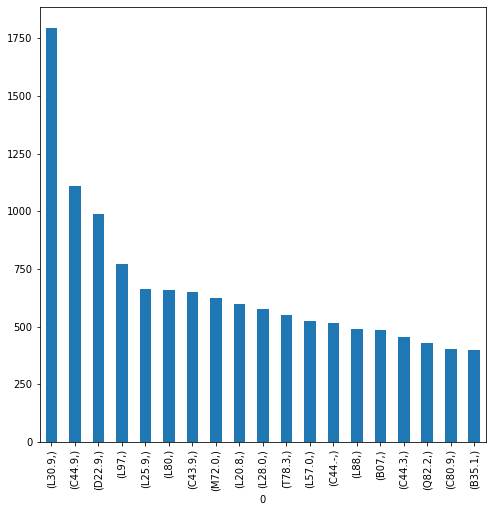

In [23]:
plot = df2.plot.bar(y='ICD-10 Code', figsize=(8, 8))